#**Final python Project**

**1. Nidhi CHAUDHARY**


## Import Libraries

In [4]:
# pip install openpyxl

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_classif
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

warnings.filterwarnings('ignore')


## Data Loading

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_india = pd.read_csv('/content/drive/MyDrive/python_covide/dataset/covid19_india.csv')



In [ ]:
df_india.sample(10)

In [ ]:
df_india.columns

In [ ]:
df_india.shape

## Observing Data

In [ ]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1390 non-null   object 
 1   continent                                   1390 non-null   object 
 2   location                                    1390 non-null   object 
 3   date                                        1390 non-null   object 
 4   total_cases                                 1358 non-null   float64
 5   new_cases                                   1382 non-null   float64
 6   new_cases_smoothed                          1377 non-null   float64
 7   total_deaths                                1315 non-null   float64
 8   new_deaths                                  1385 non-null   float64
 9   new_deaths_smoothed                         1380 non-null   float64
 10  total_cases_

In [ ]:
df_india.drop(columns=['iso_code', 'continent', 'location'], inplace=True)

## Data Encoding

In [ ]:
df = df_india.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        1390 non-null   object 
 1   total_cases                                 1358 non-null   float64
 2   new_cases                                   1382 non-null   float64
 3   new_cases_smoothed                          1377 non-null   float64
 4   total_deaths                                1315 non-null   float64
 5   new_deaths                                  1385 non-null   float64
 6   new_deaths_smoothed                         1380 non-null   float64
 7   total_cases_per_million                     1358 non-null   float64
 8   new_cases_per_million                       1382 non-null   float64
 9   new_cases_smoothed_per_million              1377 non-null   float64
 10  total_deaths

We have 2 variable in non numeric format. So we can find the missing values in their columns differently.


*   Let first encode them and then fill it with appropriate values.



In [ ]:
df['tests_units'].isnull().sum()

np.int64(559)

In [ ]:
df['tests_units'].nunique()

1

There is only one catagory. So we can consider the null value as 0.

* Let once replace them with just word 'Missing'.




In [ ]:
df['tests_units'] = df['tests_units'].fillna('Missing')
encoder = LabelEncoder()
df['tests_units'] = encoder.fit_transform(df['tests_units'])

In [ ]:
unique_encoded_values = df['tests_units'].unique()

# Get original labels before encoding
unique_labels = encoder.classes_

# Print unique encoded values and labels
for encoded_value, label in zip(unique_encoded_values, unique_labels):
    print(f"Encoded Value: {encoded_value}, Label: {label}")

Encoded Value: 0, Label: Missing
Encoded Value: 1, Label: samples tested


In [ ]:
df['tests_units'].isnull().sum()

np.int64(0)

In [ ]:
# Now get rid of date format
# Convert the column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.sample(10)

date  total_cases  new_cases  new_cases_smoothed  total_deaths  \
907  2022-06-28   43418839.0    11793.0           14206.143      525047.0   
121  2020-05-03      39980.0     2644.0            1926.286        1301.0   
1036 2022-11-04   44658365.0     1216.0            1325.286      530479.0   
580  2021-08-05   31812114.0    42982.0           40571.429      426290.0   
749  2022-01-21   38566027.0   347254.0          283414.000      488396.0   
948  2022-08-08   44161899.0    16167.0           17946.286      526730.0   
87   2020-03-30       1071.0       92.0              91.000          29.0   
818  2022-03-31   43024440.0     1225.0            1393.286      521129.0   
321  2020-11-19    8958483.0    45576.0           39223.857      131578.0   
741  2022-01-13   36317927.0   247417.0          172663.000      485035.0   

      new_deaths  new_deaths_smoothed  total_cases_per_million  \
907         27.0               22.429                30637.639   
121         83.0               68.143                   28.211   
1036        18.0              211.429                31512.286   
580        533.0              518.286                22447.585   
749        703.0              435.143                27213.349   
948         41.0               47.714                31161.965   
87           4.0                2.857                    0.756   
818         28.0              636.714                30359.340   
321        585.0              493.857                 6321.375   
741        380.0              308.429                25627.022   

      new_cases_per_million  new_cases_smoothed_per_million  ...  \
907                   8.321                          10.024  ...   
121                   1.866                           1.359  ...   
1036                  0.858                           0.935  ...   
580                  30.329                          28.628  ...   
749                 245.033                         199.985  ...   
948                  11.408                          12.663  ...   
87                    0.065                           0.064  ...   
818                   0.864                           0.983  ...   
321                  32.160                          27.678  ...   
741                 174.585                         121.836  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
907           20.6                   59.55                        0.53   
121           20.6                   59.55                        0.53   
1036          20.6                   59.55                        0.53   
580           20.6                   59.55                        0.53   
749           20.6                   59.55                        0.53   
948           20.6                   59.55                        0.53   
87            20.6                   59.55                        0.53   
818           20.6                   59.55                        0.53   
321           20.6                   59.55                        0.53   
741           20.6                   59.55                        0.53   

      life_expectancy  human_development_index  population  \
907             69.66                    0.645  1417173120   
121             69.66                    0.645  1417173120   
1036            69.66                    0.645  1417173120   
580             69.66                    0.645  1417173120   
749             69.66                    0.645  1417173120   
948             69.66                    0.645  1417173120   
87              69.66                    0.645  1417173120   
818             69.66                    0.645  1417173120   
321             69.66                    0.645  1417173120   
741             69.66                    0.645  1417173120   

      excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
907                                    NaN                          NaN   
121                                    

## Missing Value Analysis

### Data Visualization to analize missing values

<Axes: >

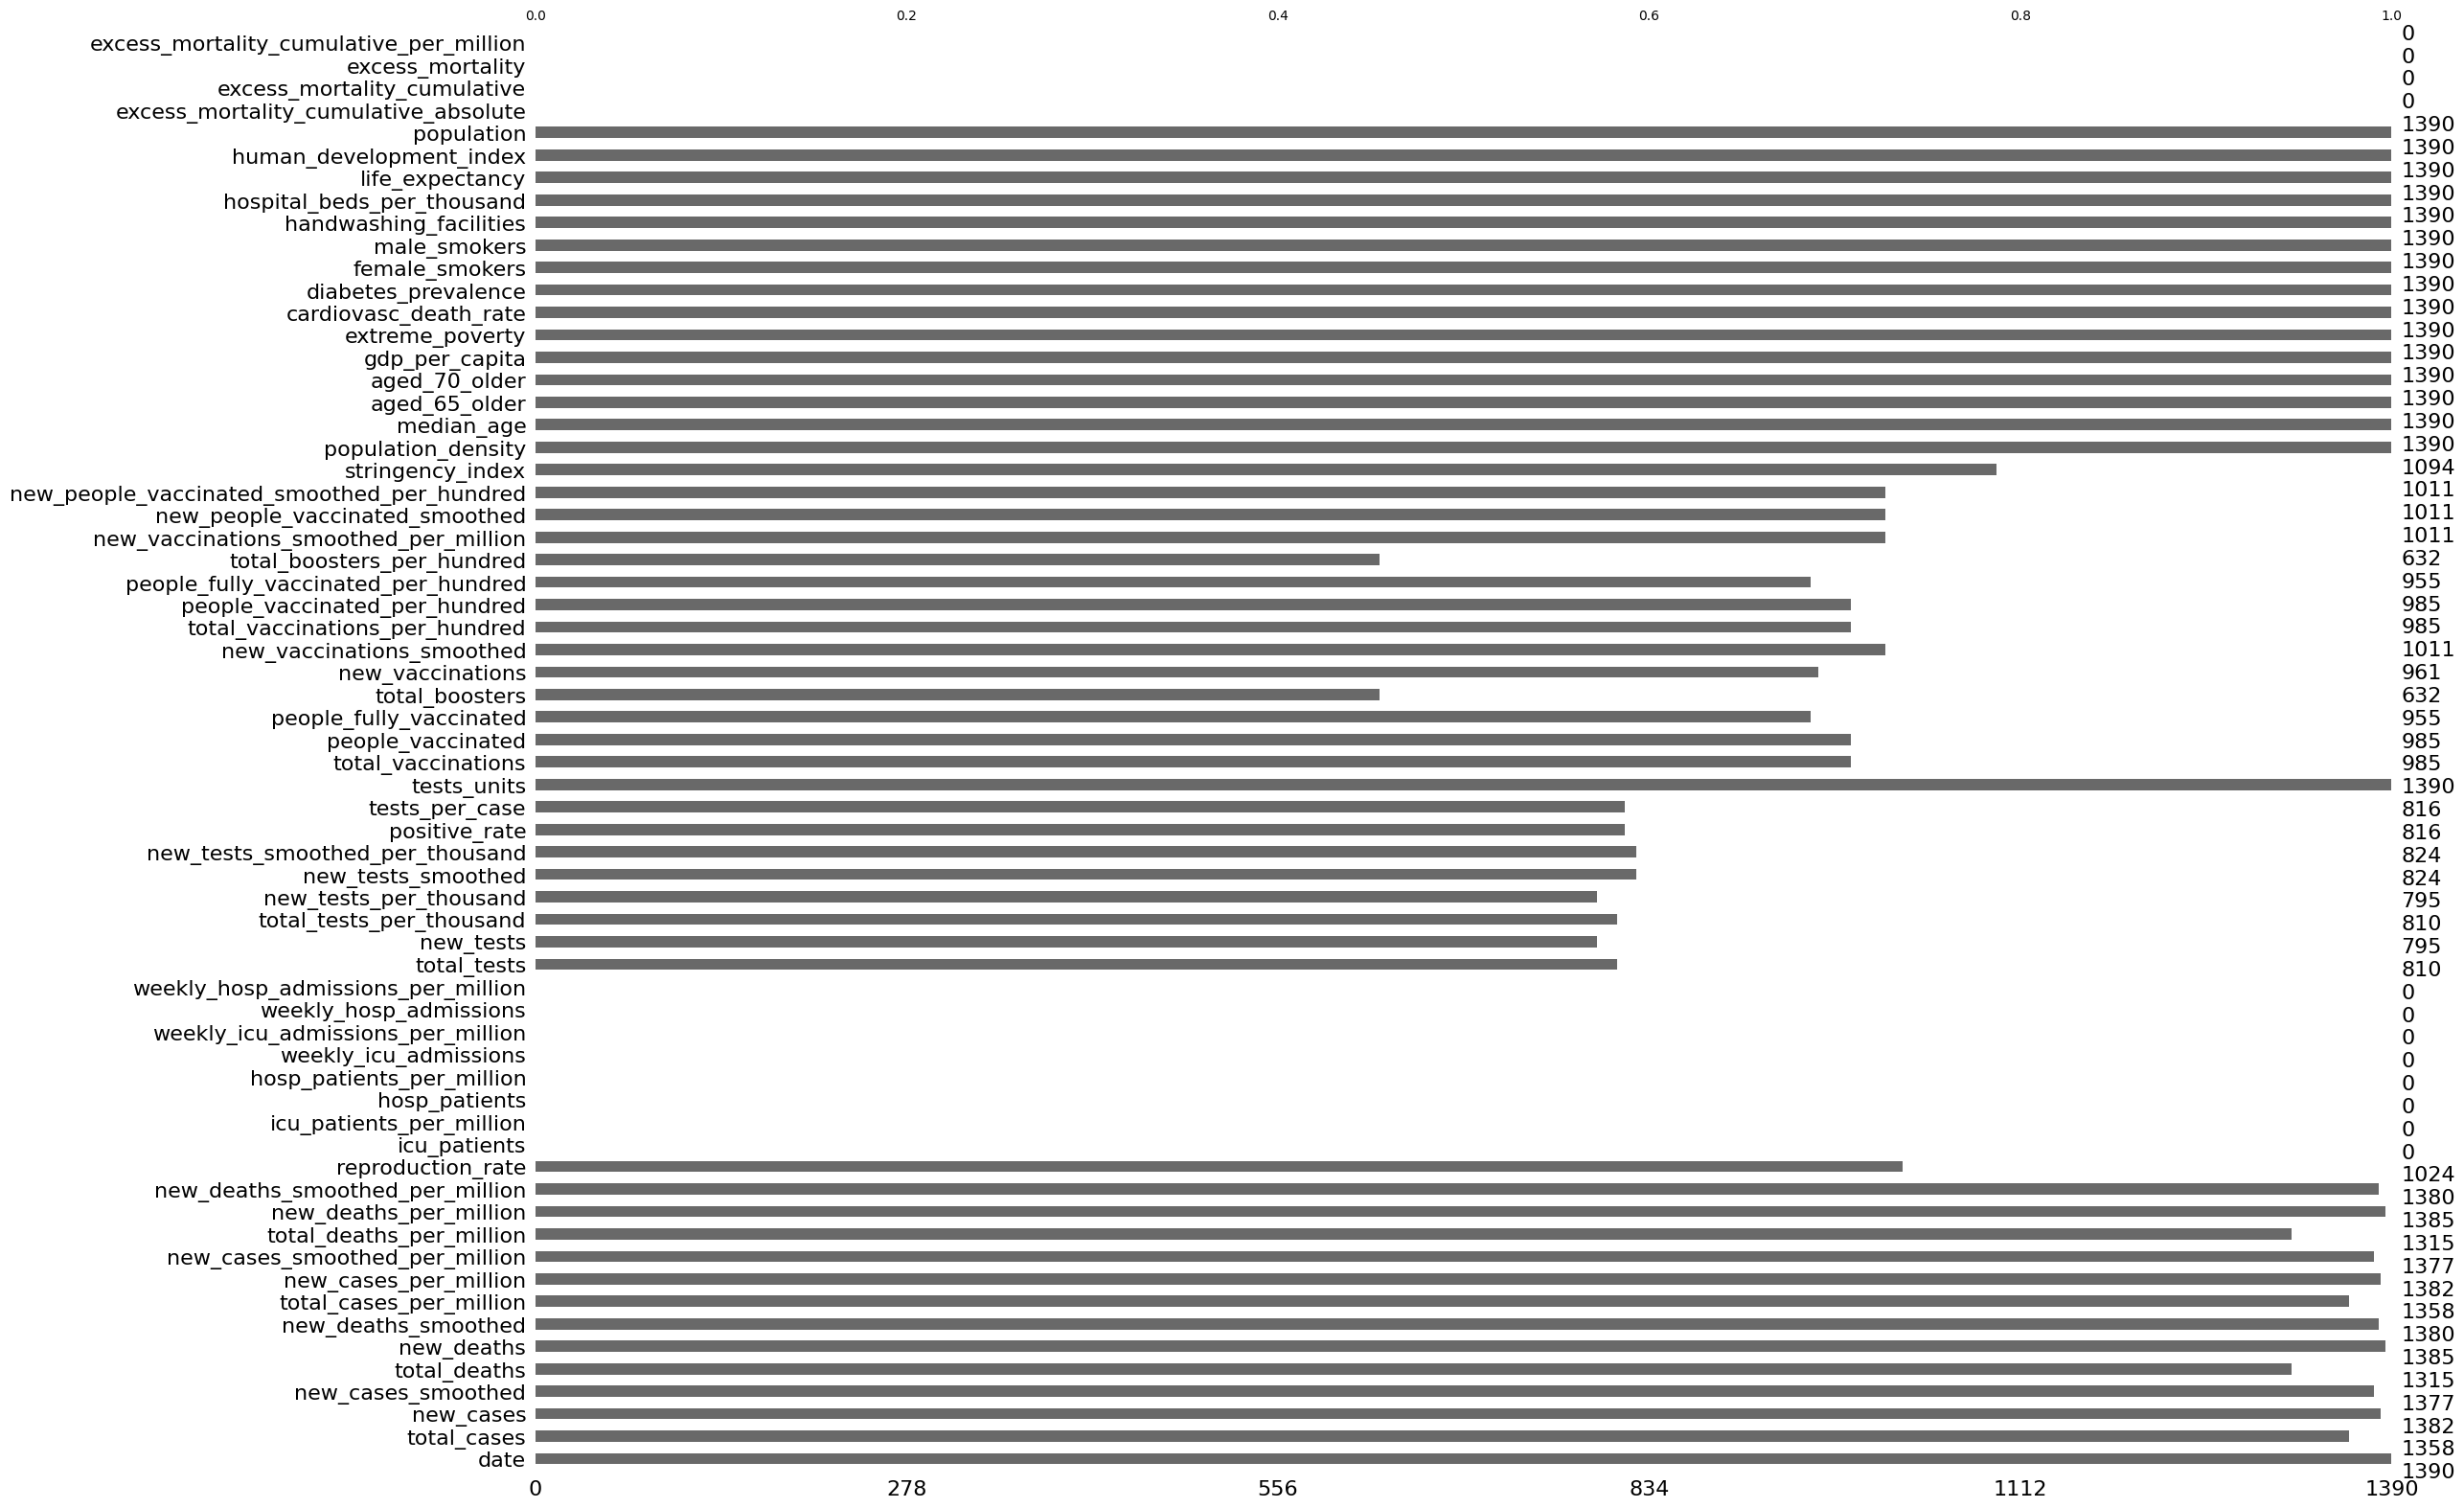

In [ ]:
msno.bar(df)

<Axes: >

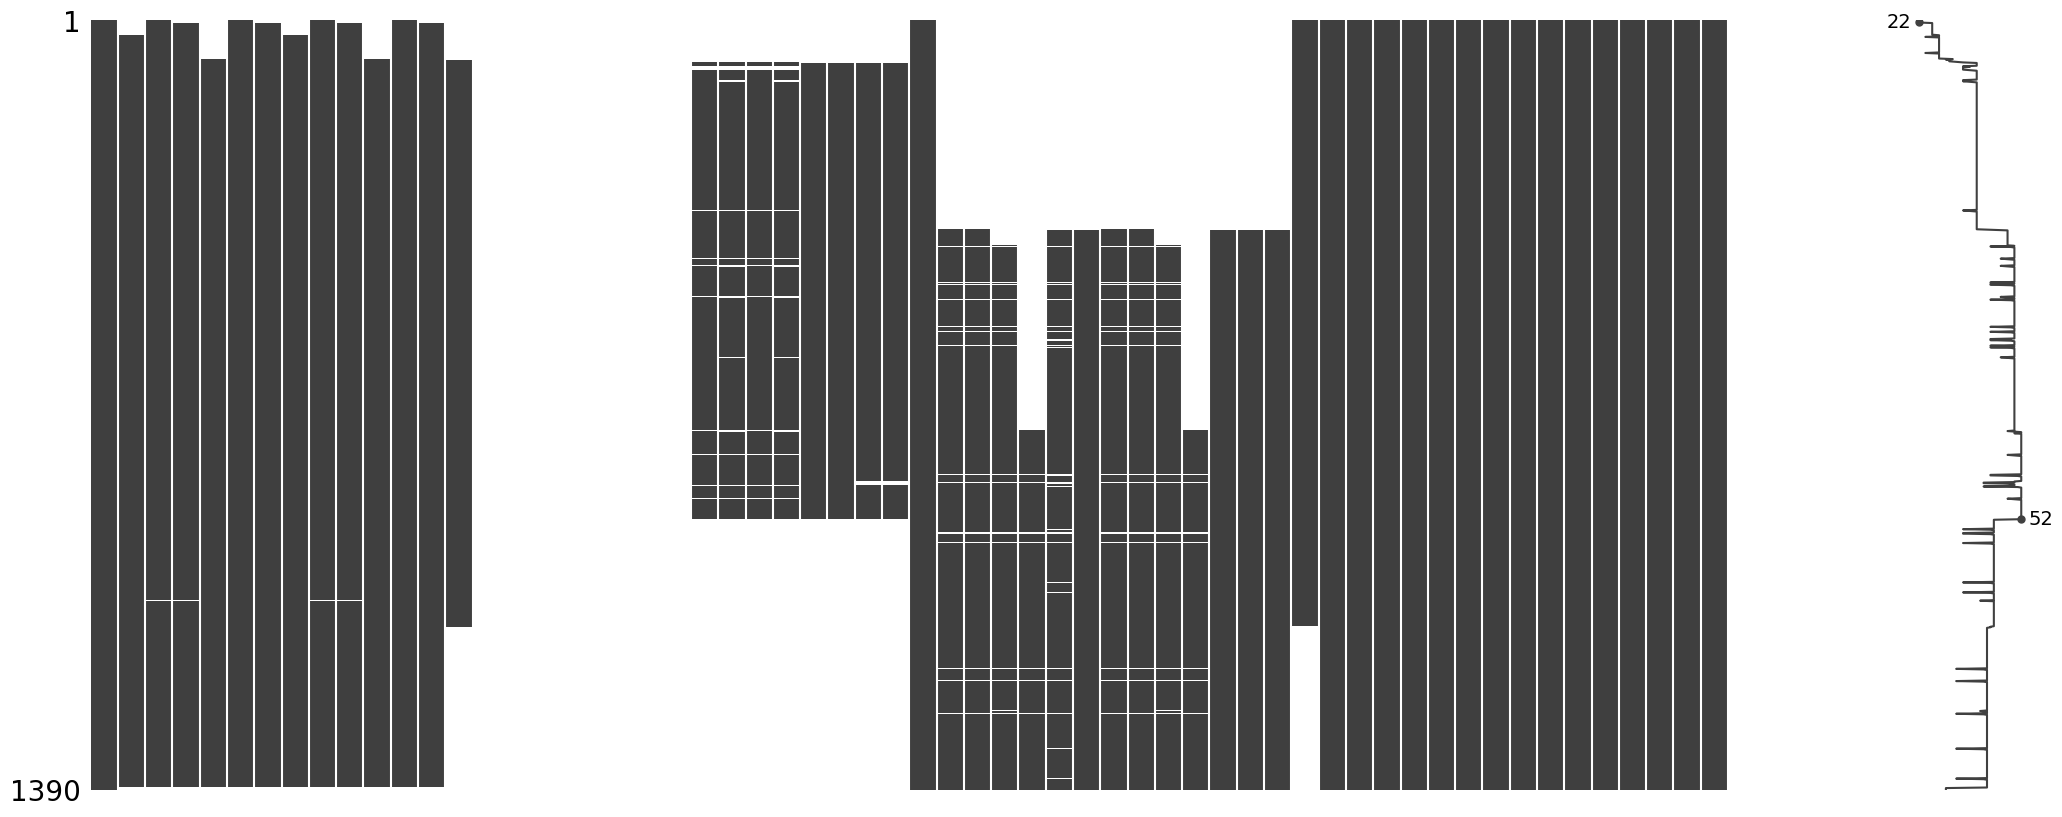

In [ ]:
msno.matrix(df)

<Axes: >

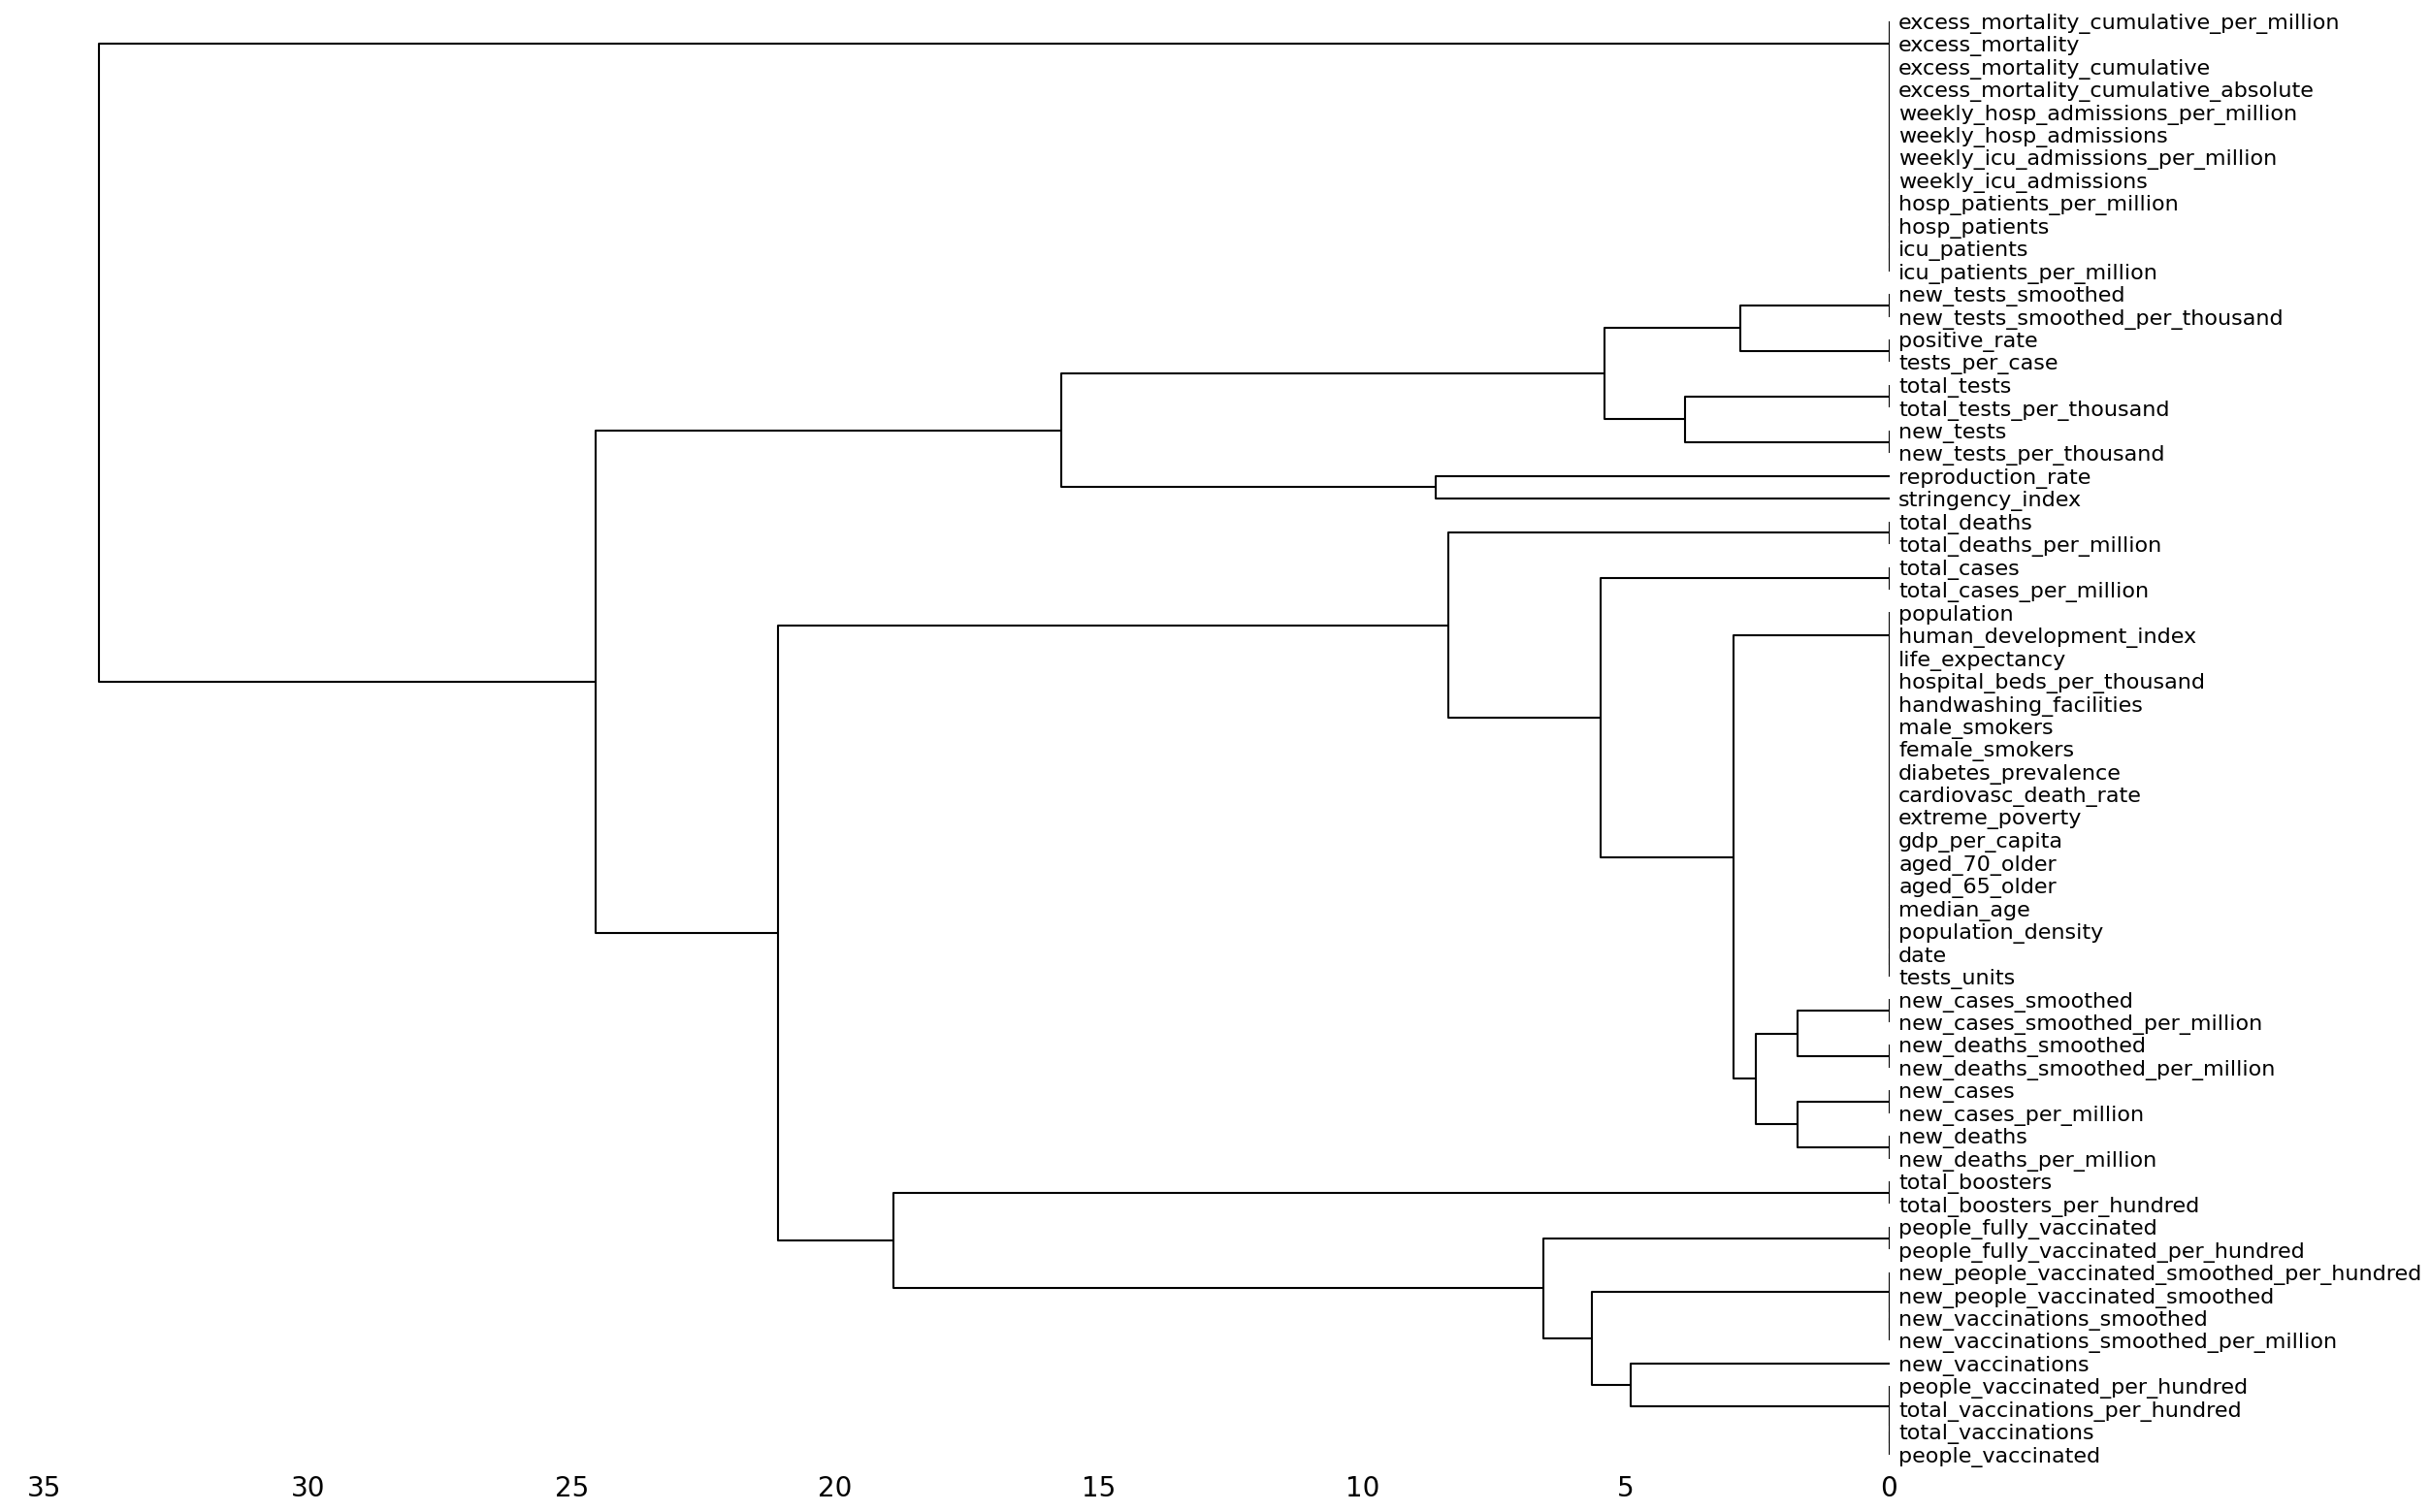

In [ ]:
msno.dendrogram(df)

### Missing Value Mechanism

In [ ]:
print(df.isnull().sum()/df.shape[0]*100)

date                                         0.000000
total_cases                                  2.302158
new_cases                                    0.575540
new_cases_smoothed                           0.935252
total_deaths                                 5.395683
                                              ...    
population                                   0.000000
excess_mortality_cumulative_absolute       100.000000
excess_mortality_cumulative                100.000000
excess_mortality                           100.000000
excess_mortality_cumulative_per_million    100.000000
Length: 64, dtype: float64


In [ ]:
missing_percentage = (df.isnull().sum()/df.shape[0]*100)

columns_to_drop = missing_percentage[missing_percentage > 50].index
print(missing_percentage[missing_percentage > 50])
df = df.drop(columns=columns_to_drop)

icu_patients                               100.000000
icu_patients_per_million                   100.000000
hosp_patients                              100.000000
hosp_patients_per_million                  100.000000
weekly_icu_admissions                      100.000000
weekly_icu_admissions_per_million          100.000000
weekly_hosp_admissions                     100.000000
weekly_hosp_admissions_per_million         100.000000
total_boosters                              54.532374
total_boosters_per_hundred                  54.532374
excess_mortality_cumulative_absolute       100.000000
excess_mortality_cumulative                100.000000
excess_mortality                           100.000000
excess_mortality_cumulative_per_million    100.000000
dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        1390 non-null   datetime64[ns]
 1   total_cases                                 1358 non-null   float64       
 2   new_cases                                   1382 non-null   float64       
 3   new_cases_smoothed                          1377 non-null   float64       
 4   total_deaths                                1315 non-null   float64       
 5   new_deaths                                  1385 non-null   float64       
 6   new_deaths_smoothed                         1380 non-null   float64       
 7   total_cases_per_million                     1358 non-null   float64       
 8   new_cases_per_million                       1382 non-null   float64       
 9   new_case

In [ ]:

numeric_columns = df.select_dtypes(exclude=['object']).columns
df[numeric_columns] = df[numeric_columns].fillna(method='ffill').fillna(df[numeric_columns].mean())

print(df.isnull().sum())

date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
total_tests                                   0
new_tests                                     0
total_tests_per_thousand                      0
new_tests_per_thousand                        0
new_tests_smoothed                            0
new_tests_smoothed_per_thousand               0
positive_rate                           

## Outlier Detection

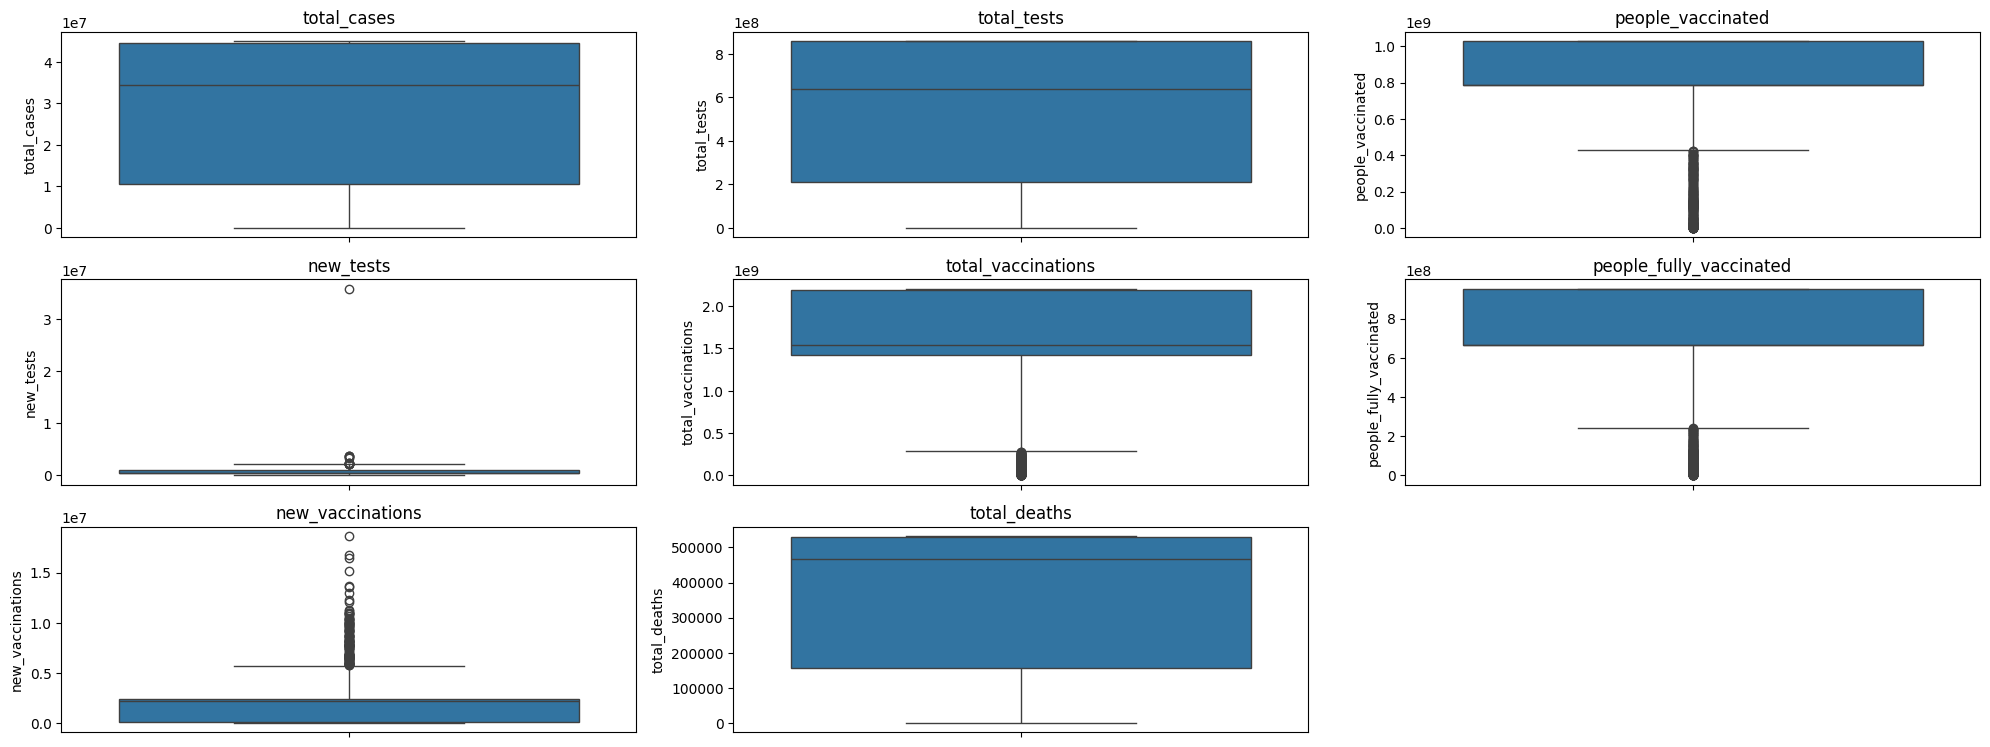

In [ ]:

columns_to_plot = ['total_cases', 'total_tests', 'people_vaccinated',
                   'new_tests', 'total_vaccinations',
                   'people_fully_vaccinated', 'new_vaccinations', 'total_deaths']


plt.figure(figsize=(20, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
all_outliers = pd.Series(False, index=df.index)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)


    all_outliers = all_outliers | col_outliers

df_cleaned = df[~all_outliers]
print(f"Number of rows removed: {all_outliers.sum()}")
print(f"Data after cleaning: {df_cleaned.shape}")

Number of rows removed: 624
Data after cleaning: (766, 50)


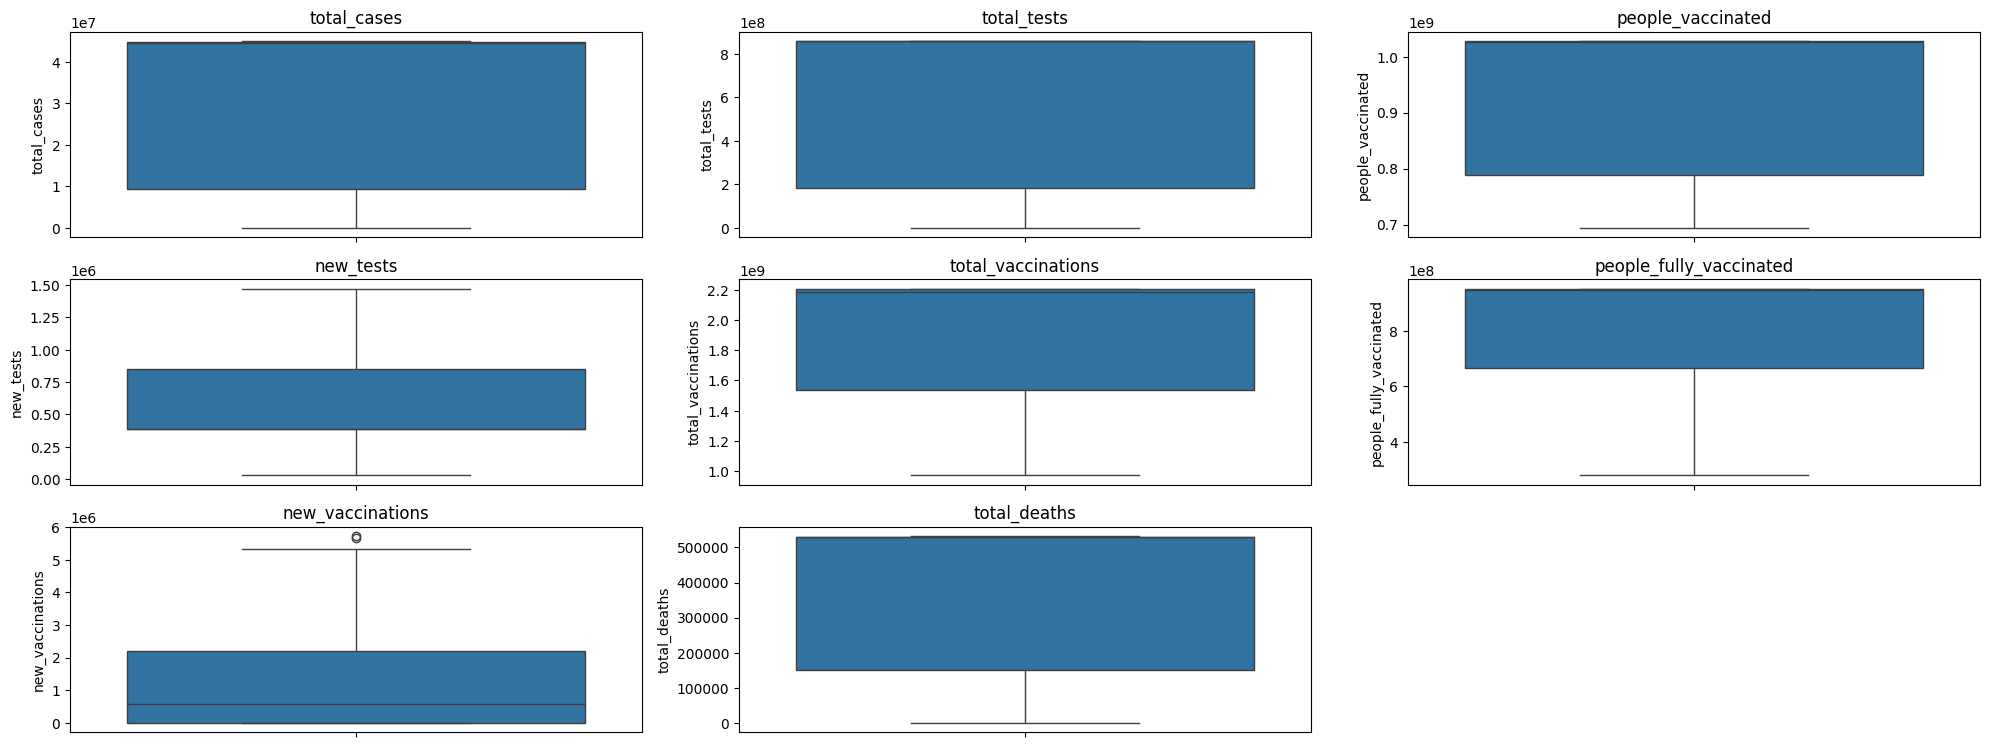

In [ ]:

columns_to_plot = ['total_cases', 'total_tests', 'people_vaccinated',
                   'new_tests', 'total_vaccinations',
                   'people_fully_vaccinated', 'new_vaccinations', 'total_deaths']


plt.figure(figsize=(20, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

We Don't to remove outliers because they it will change our results.

## Data Visualization

### Univariate Analysis

In [ ]:
filtered_features = ['total_cases','new_cases','total_tests','people_vaccinated','new_tests','positive_rate','total_vaccinations','people_fully_vaccinated','new_vaccinations','total_deaths','new_deaths']

In [ ]:
df_cleaned[filtered_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 0 to 1389
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_cases              766 non-null    float64
 1   new_cases                766 non-null    float64
 2   total_tests              766 non-null    float64
 3   people_vaccinated        766 non-null    float64
 4   new_tests                766 non-null    float64
 5   positive_rate            766 non-null    float64
 6   total_vaccinations       766 non-null    float64
 7   people_fully_vaccinated  766 non-null    float64
 8   new_vaccinations         766 non-null    float64
 9   total_deaths             766 non-null    float64
 10  new_deaths               766 non-null    float64
dtypes: float64(11)
memory usage: 71.8 KB


Here all the rows are numeric columns so we didn't need to worry about plots for catagorical variables.

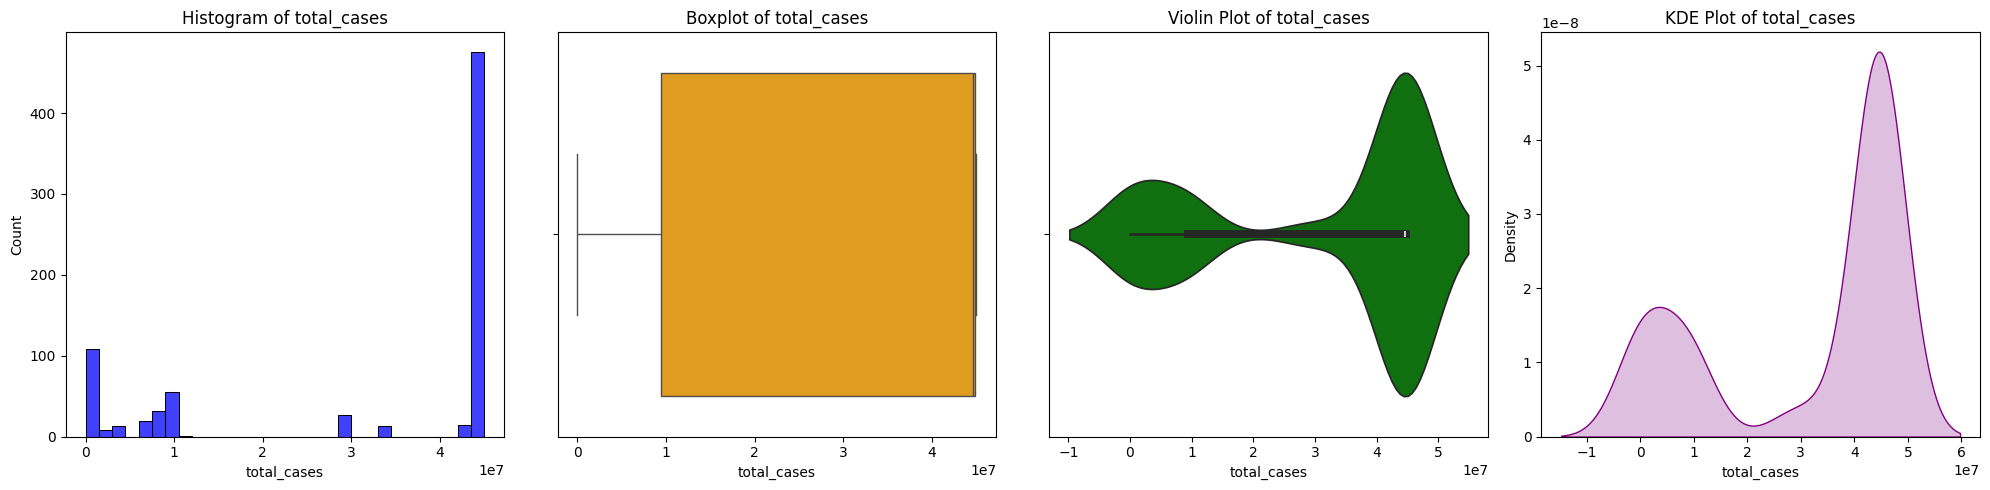

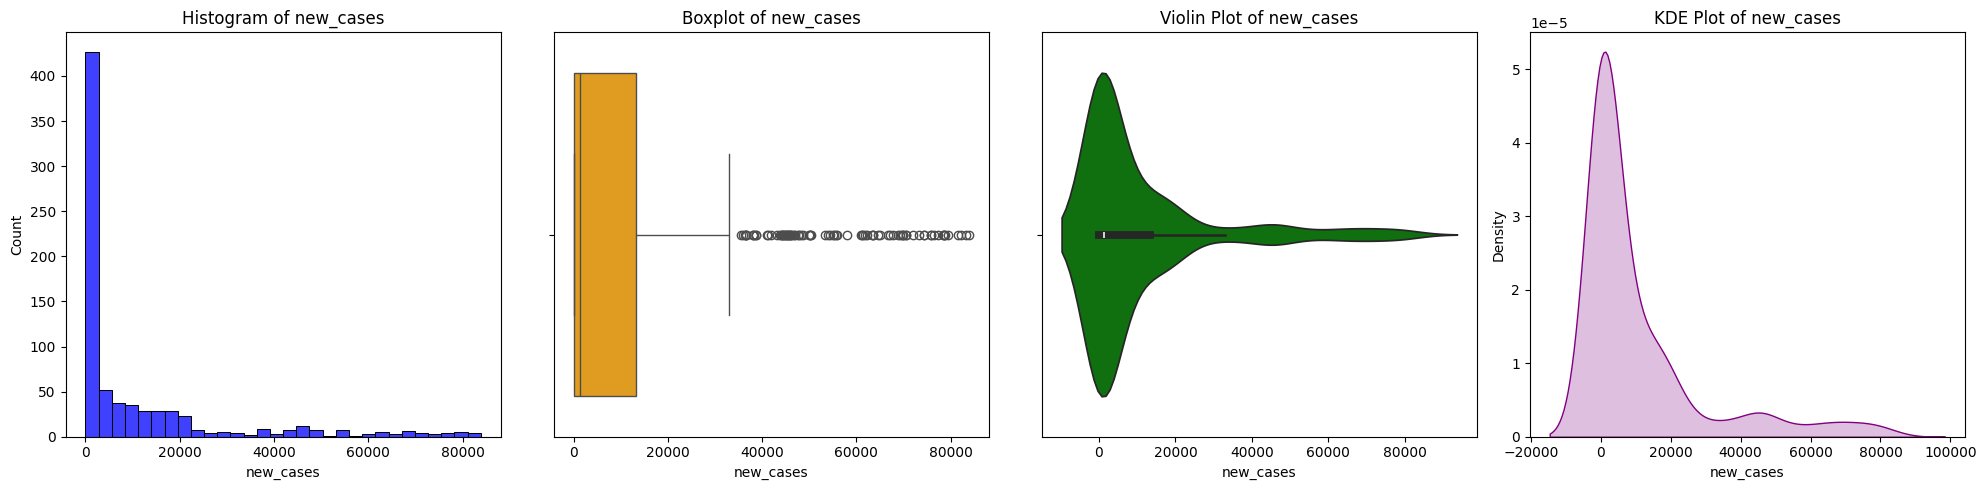

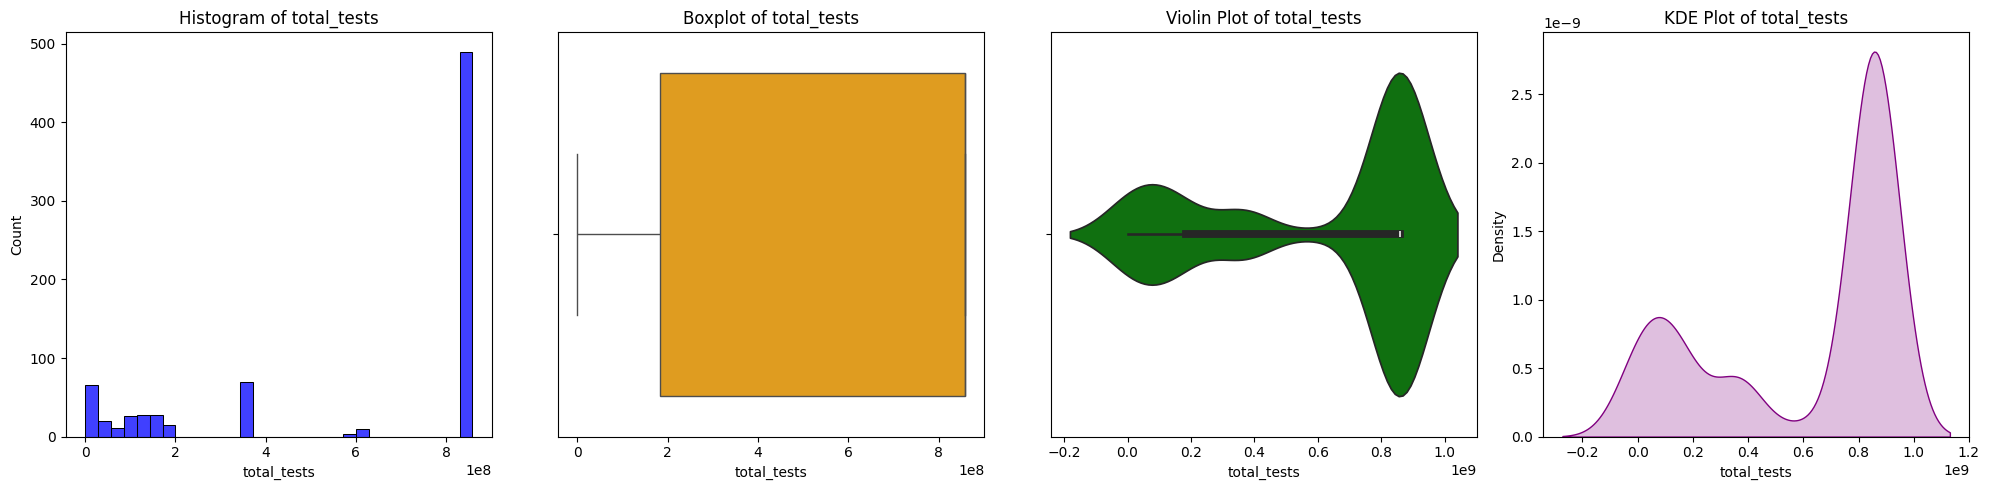

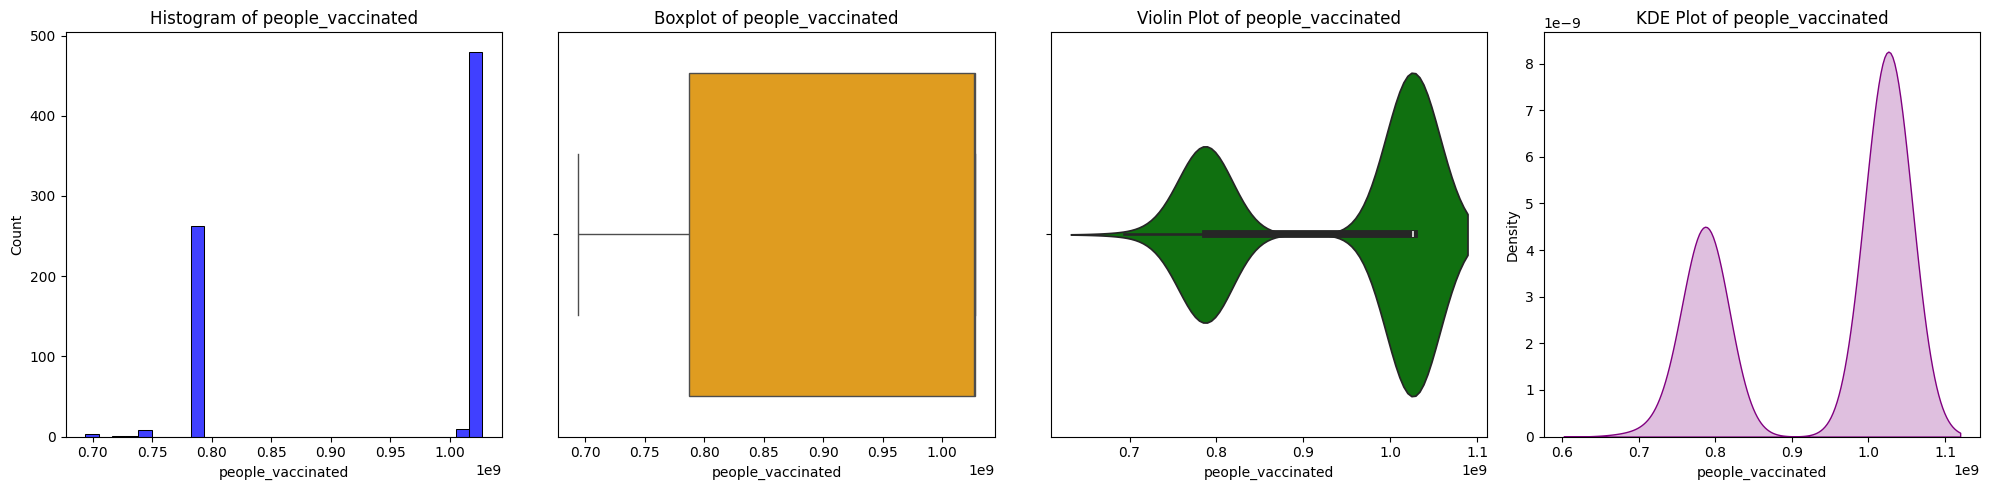

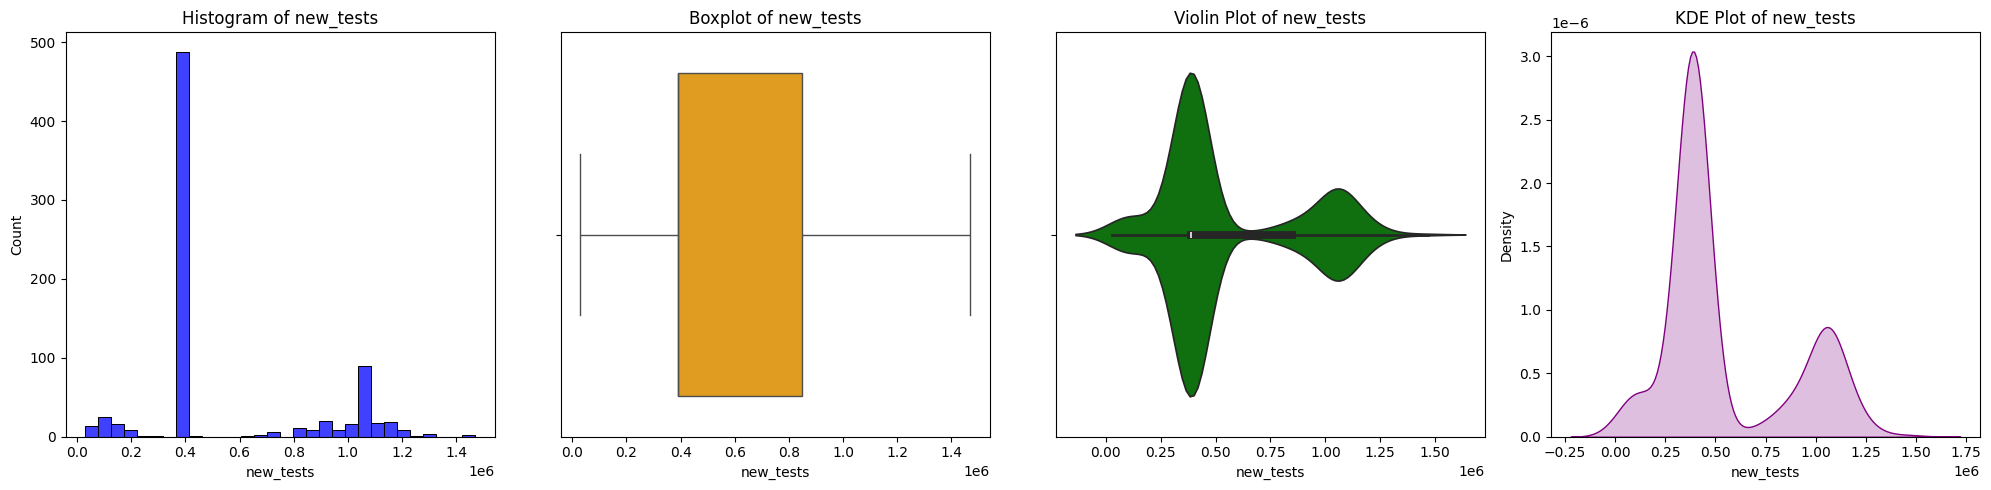

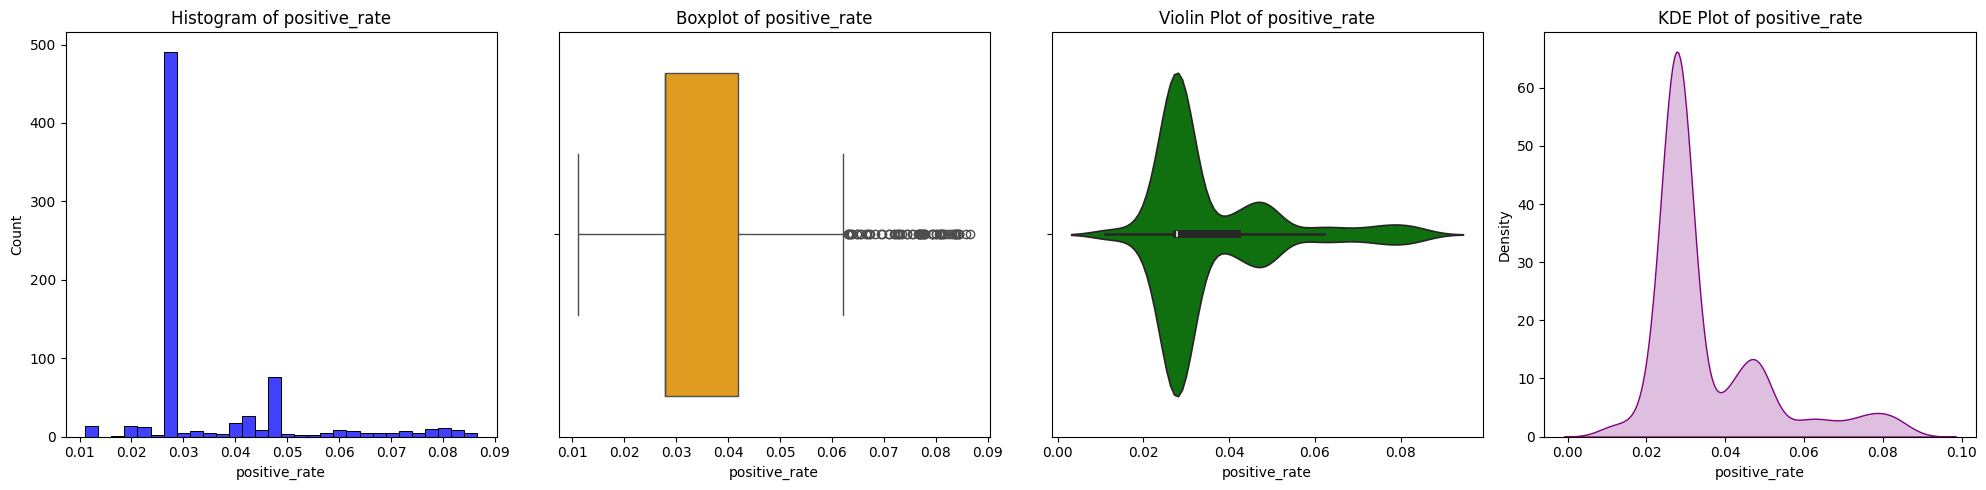

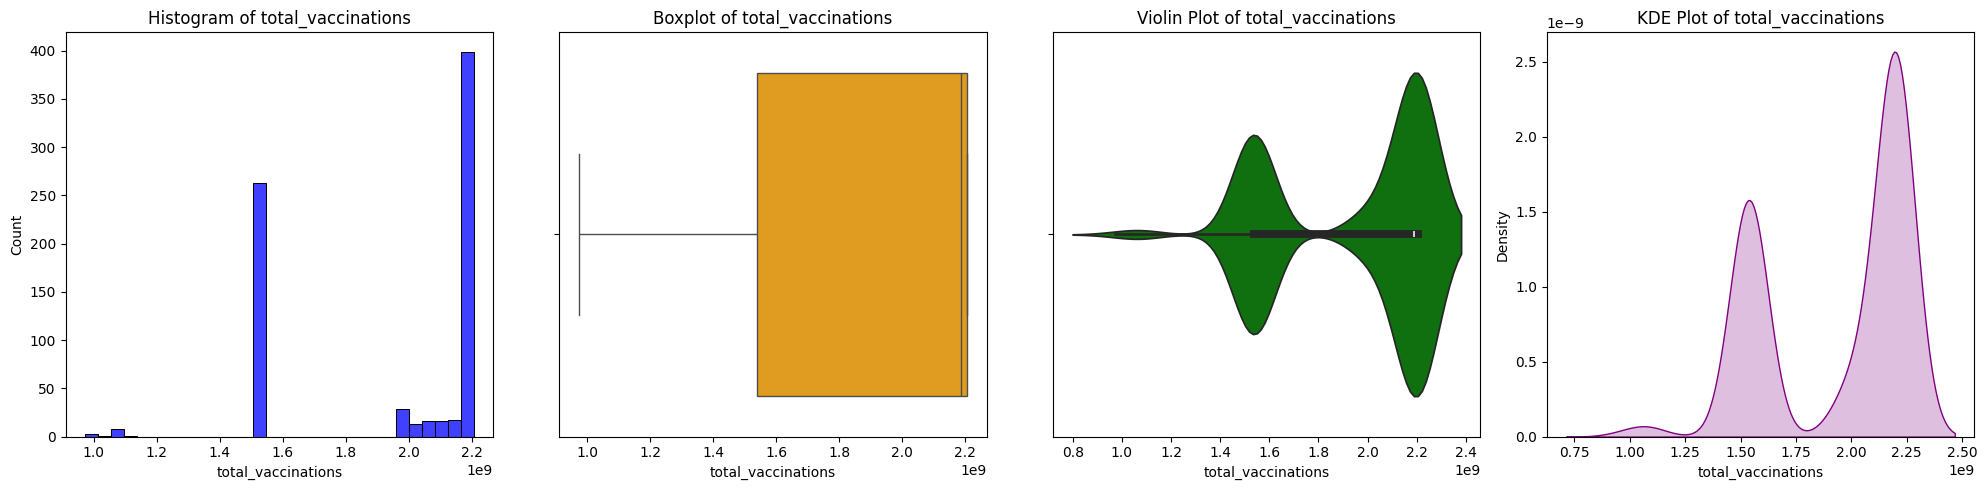

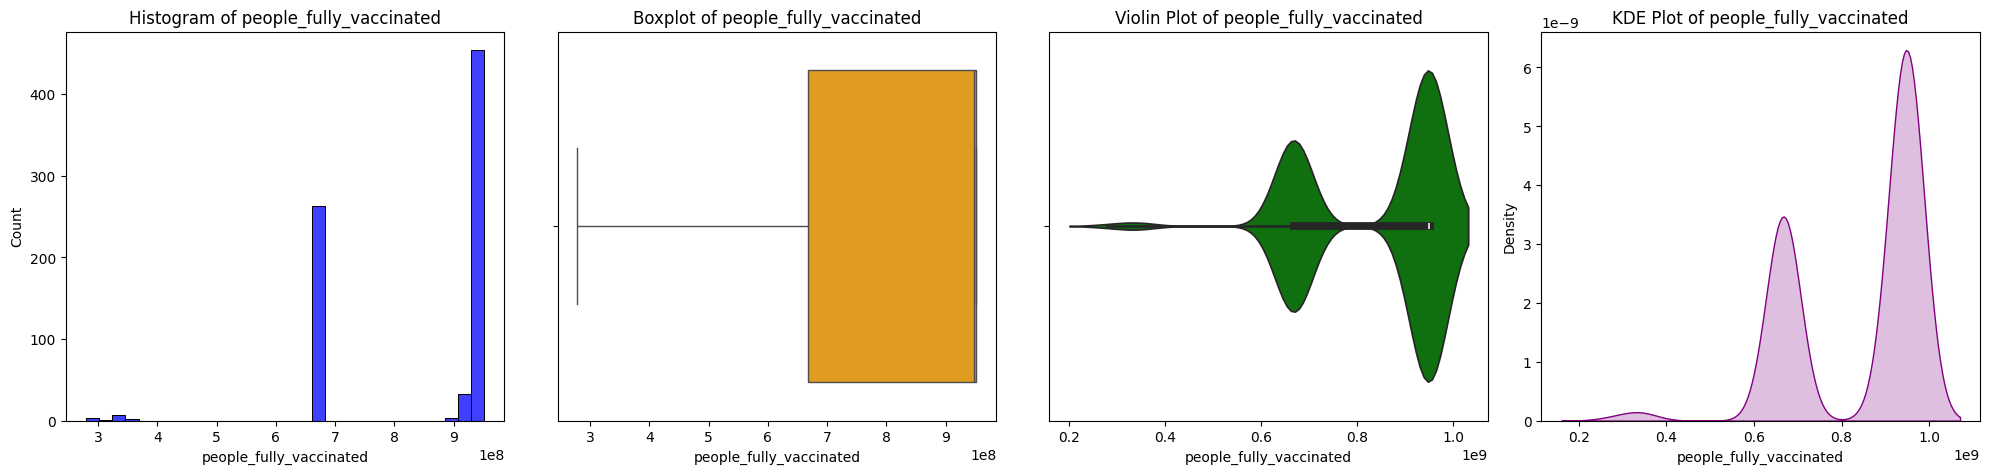

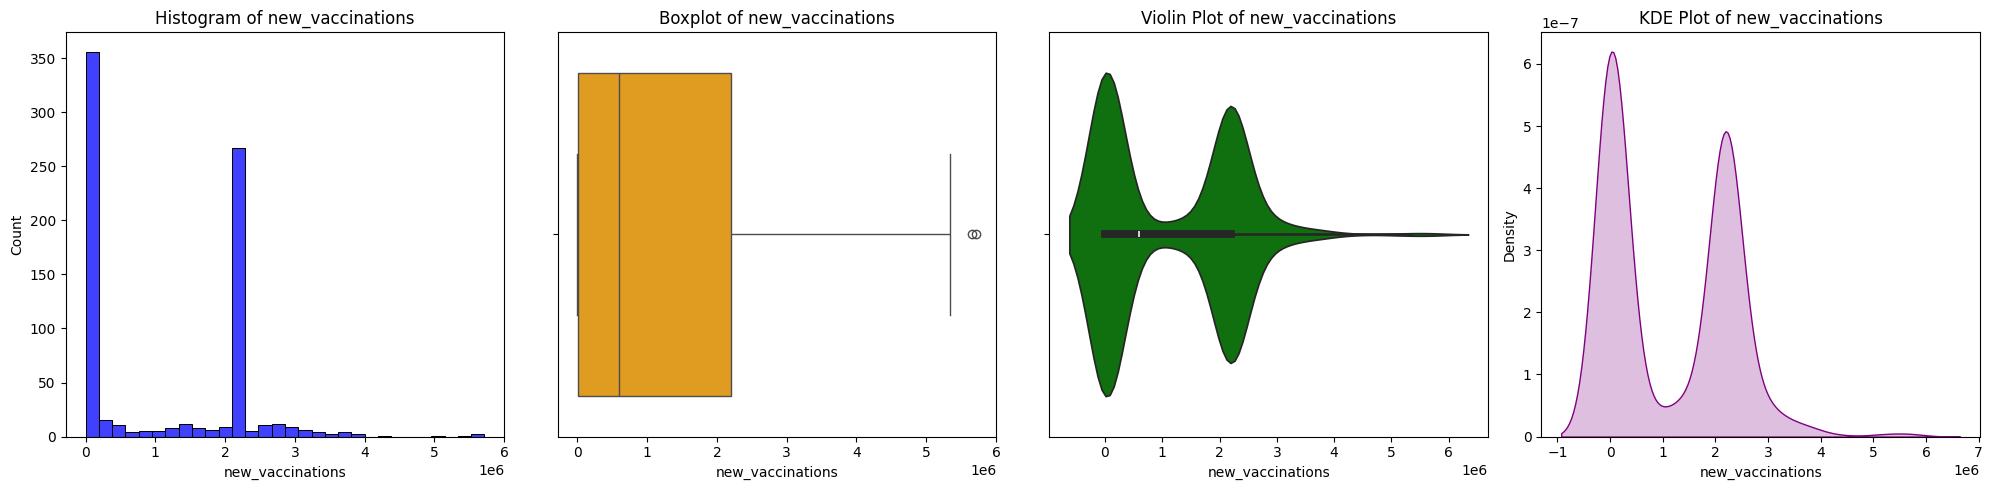

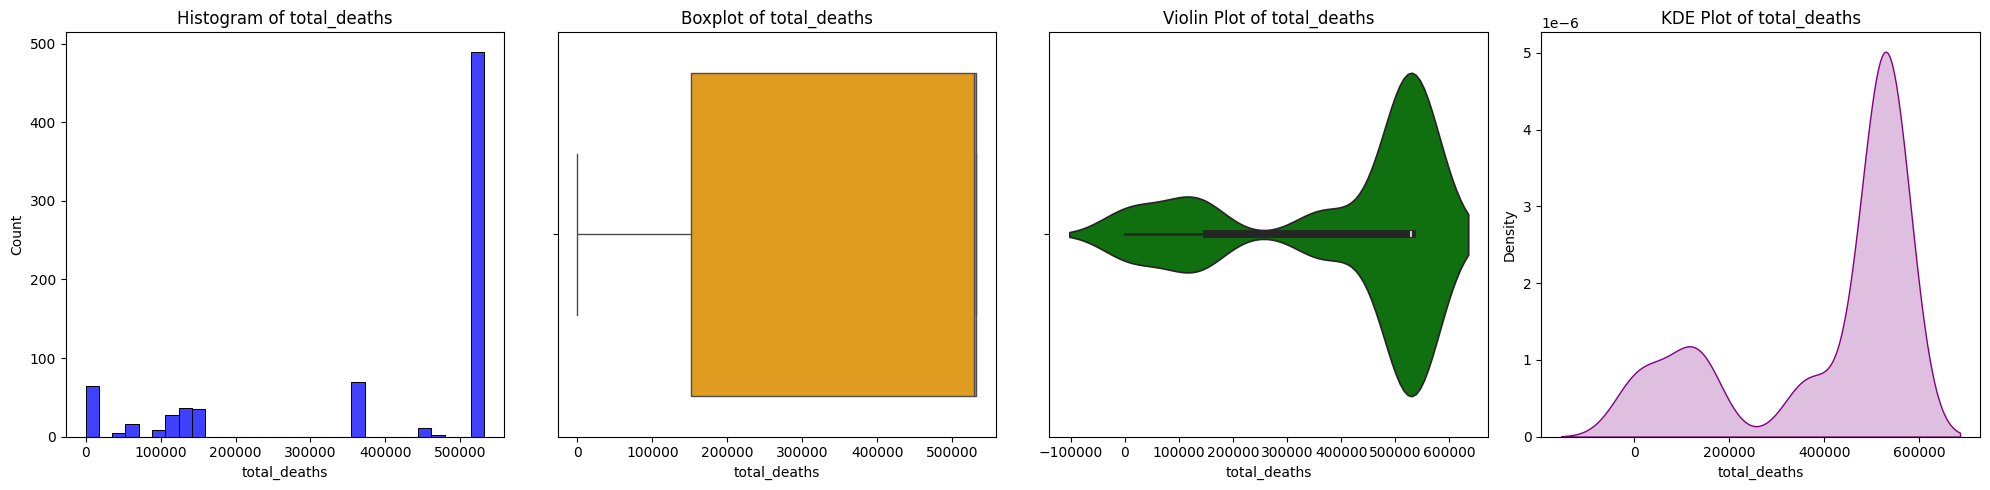

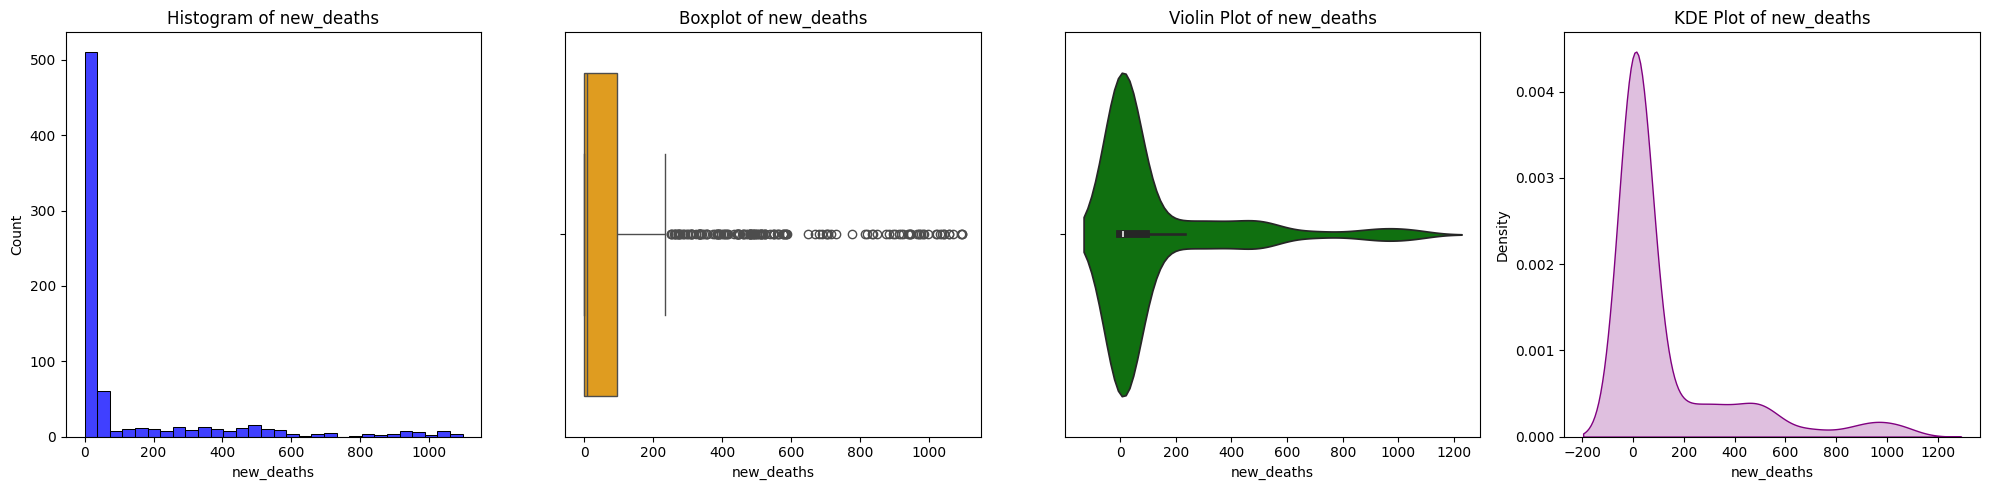

In [ ]:
for column in filtered_features:
    plt.figure(figsize=(20, 5))

    if pd.api.types.is_numeric_dtype(df_cleaned[column]):


        # Histogram
        plt.subplot(1, 4, 1)
        sns.histplot(df_cleaned[column], bins=30, color='blue')
        plt.title(f'Histogram of {column}')

        # Boxplot
        plt.subplot(1, 4, 2)
        sns.boxplot(x=df_cleaned[column], color='orange')
        plt.title(f'Boxplot of {column}')

        # Violin plot
        plt.subplot(1, 4, 3)
        sns.violinplot(x=df_cleaned[column], color='green')
        plt.title(f'Violin Plot of {column}')

        # KDE plot
        plt.subplot(1, 4, 4)
        sns.kdeplot(df_cleaned[column], fill=True, color='purple')
        plt.title(f'KDE Plot of {column}')

    plt.tight_layout()
    plt.show()

### Multivariate Analysis

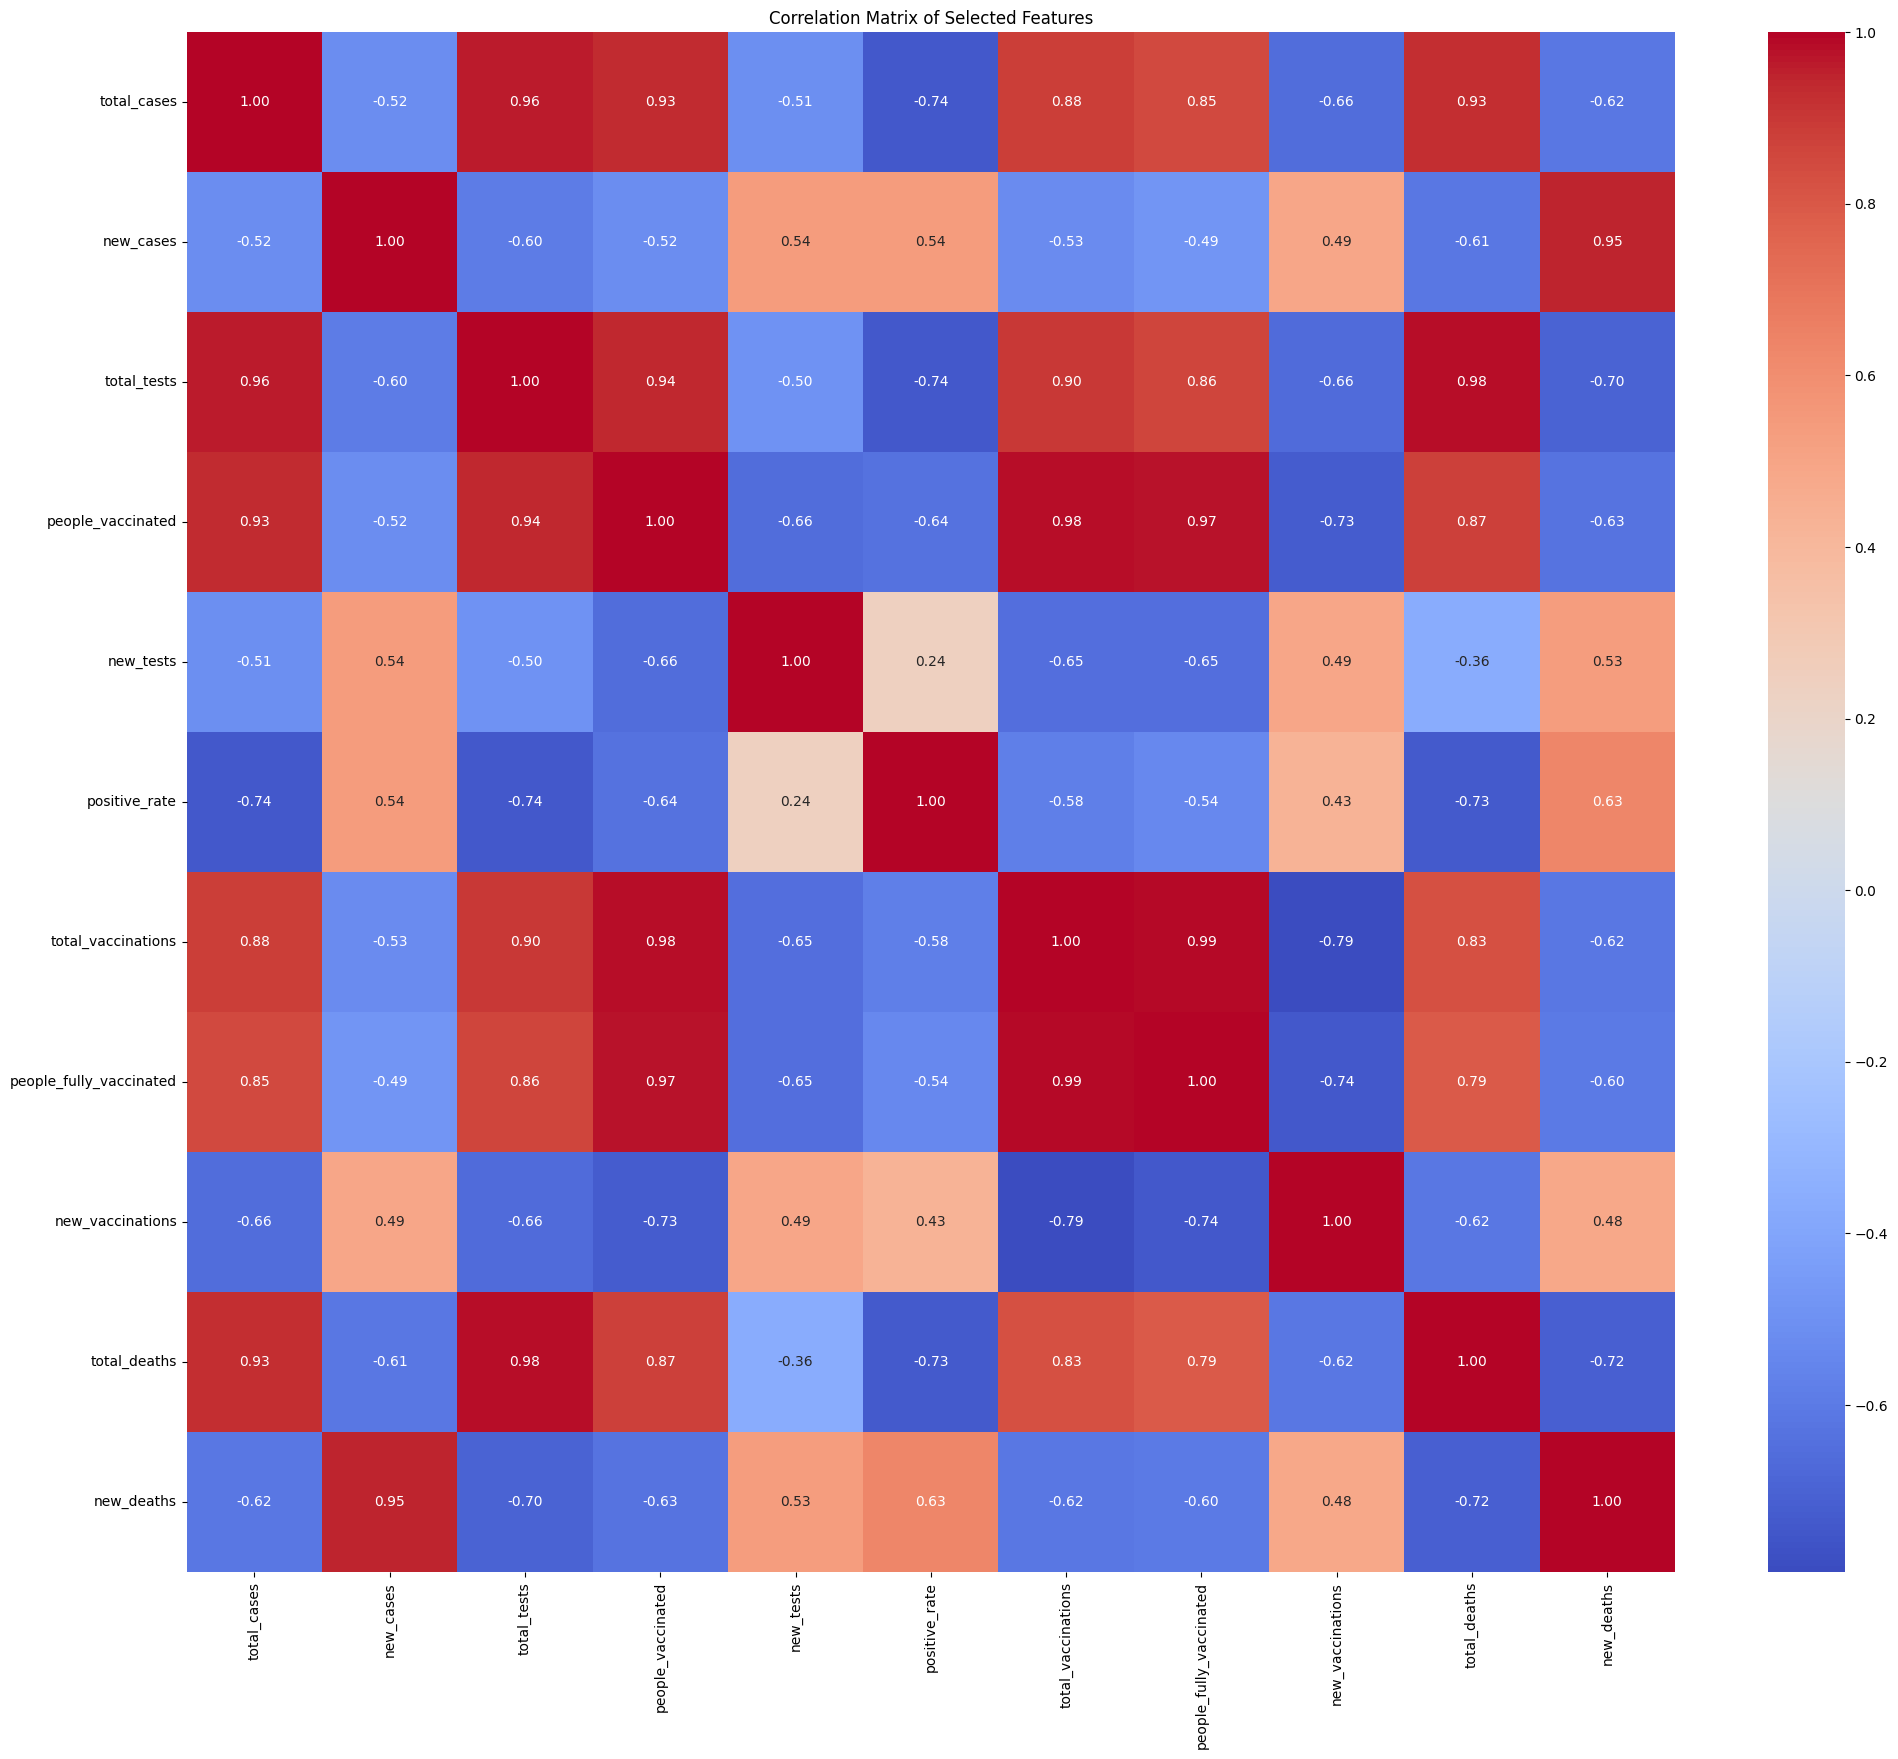

In [ ]:

plt.figure(figsize=(24,20))
sns.heatmap(df_cleaned[filtered_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

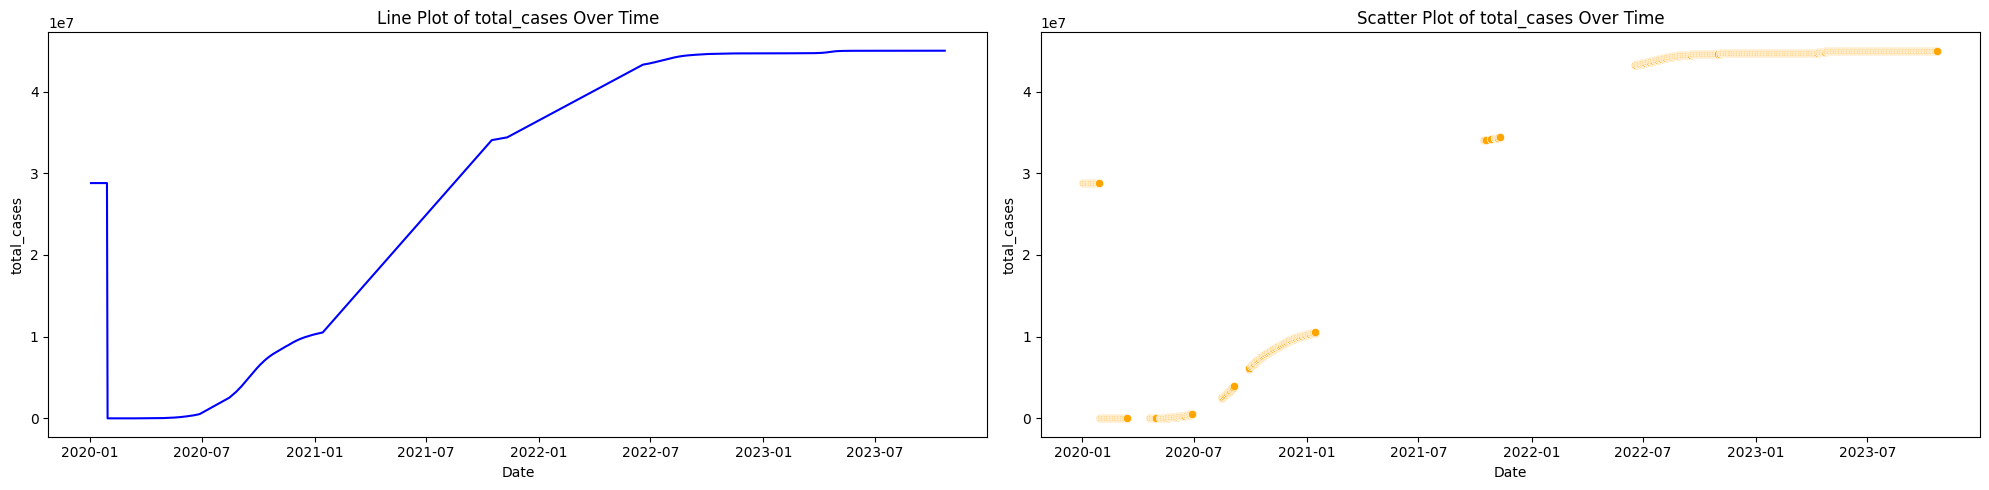

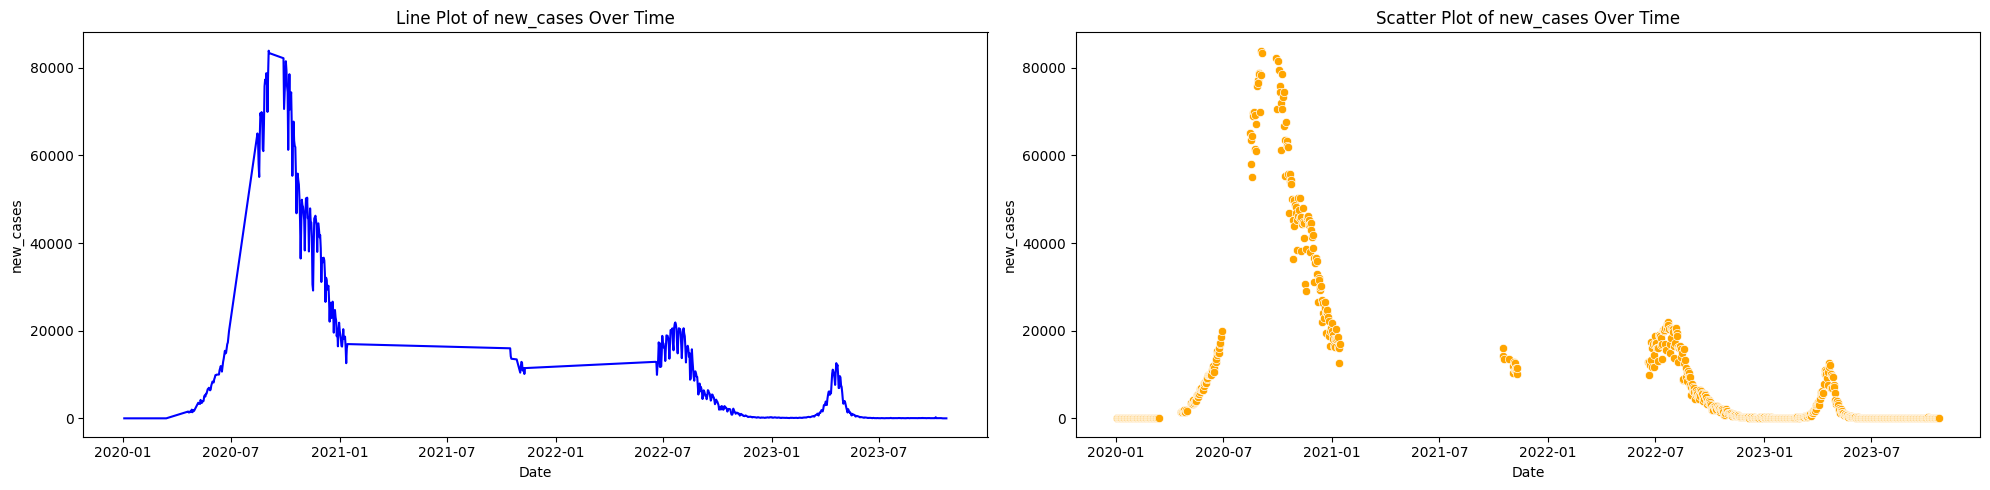

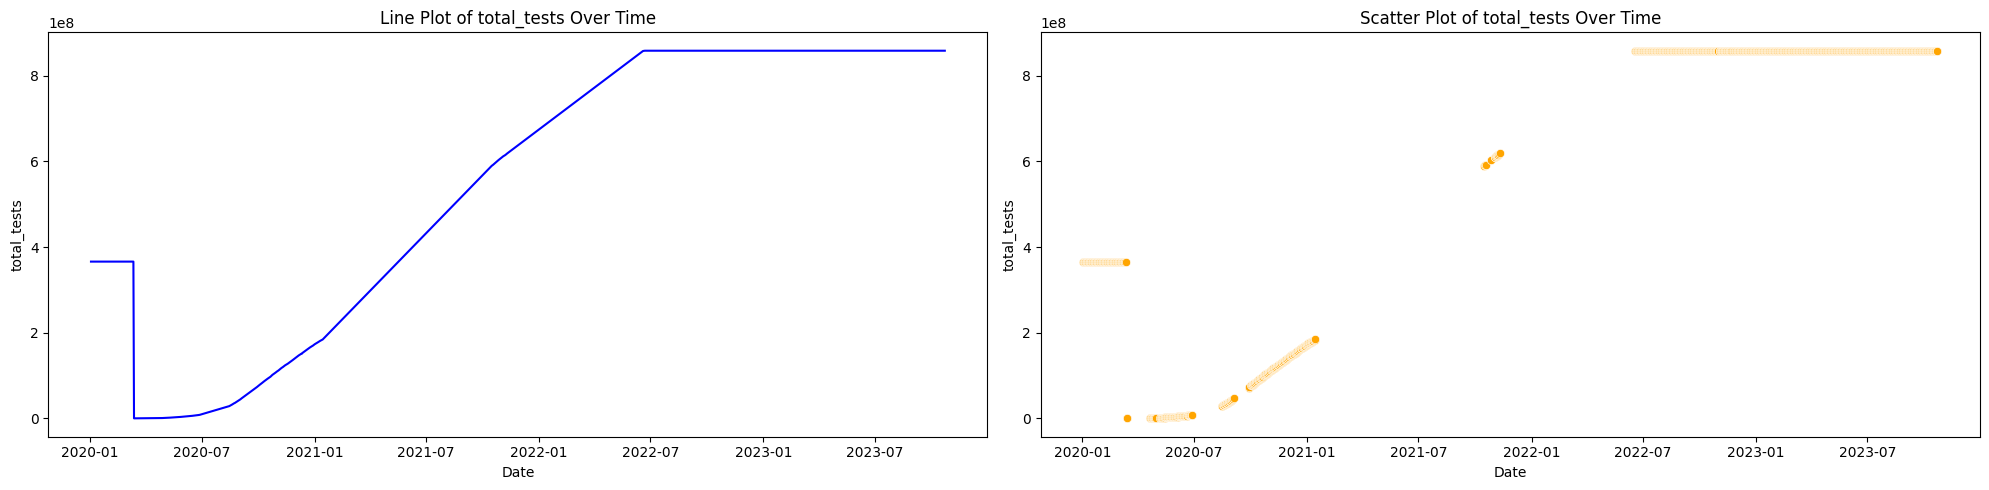

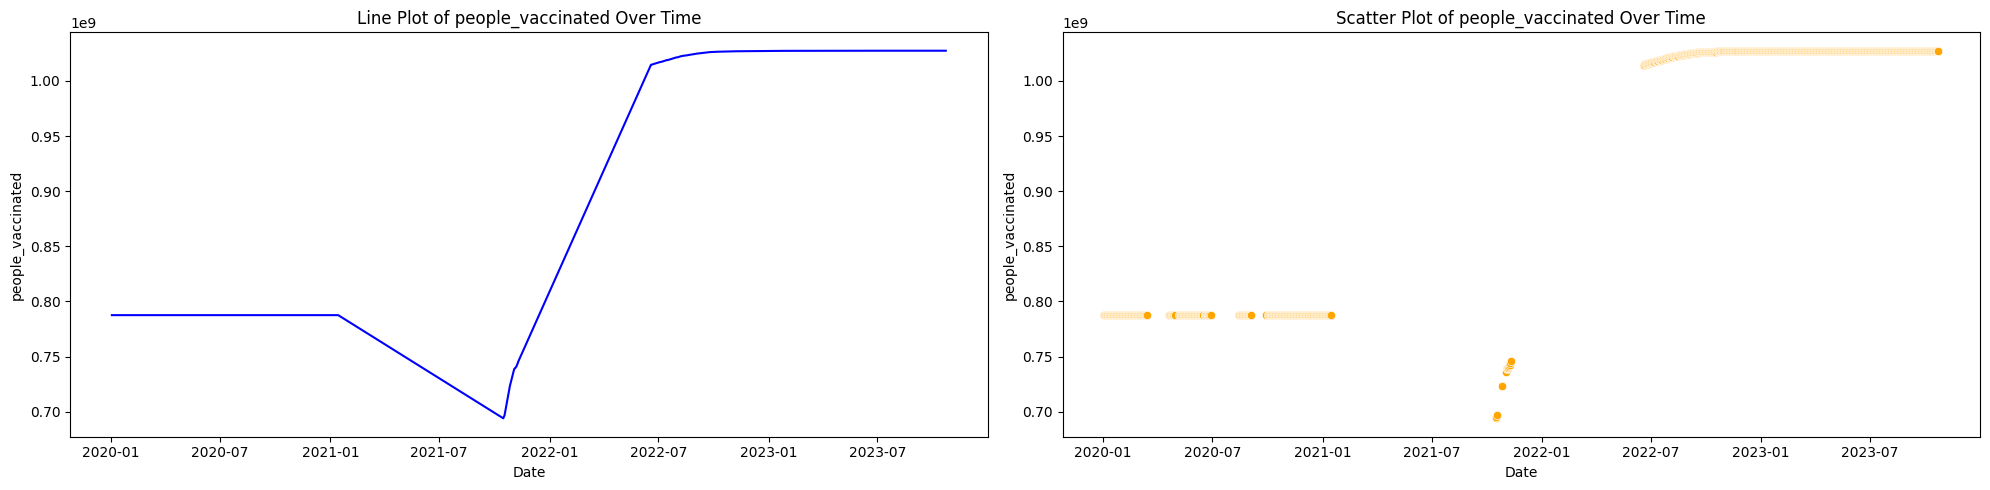

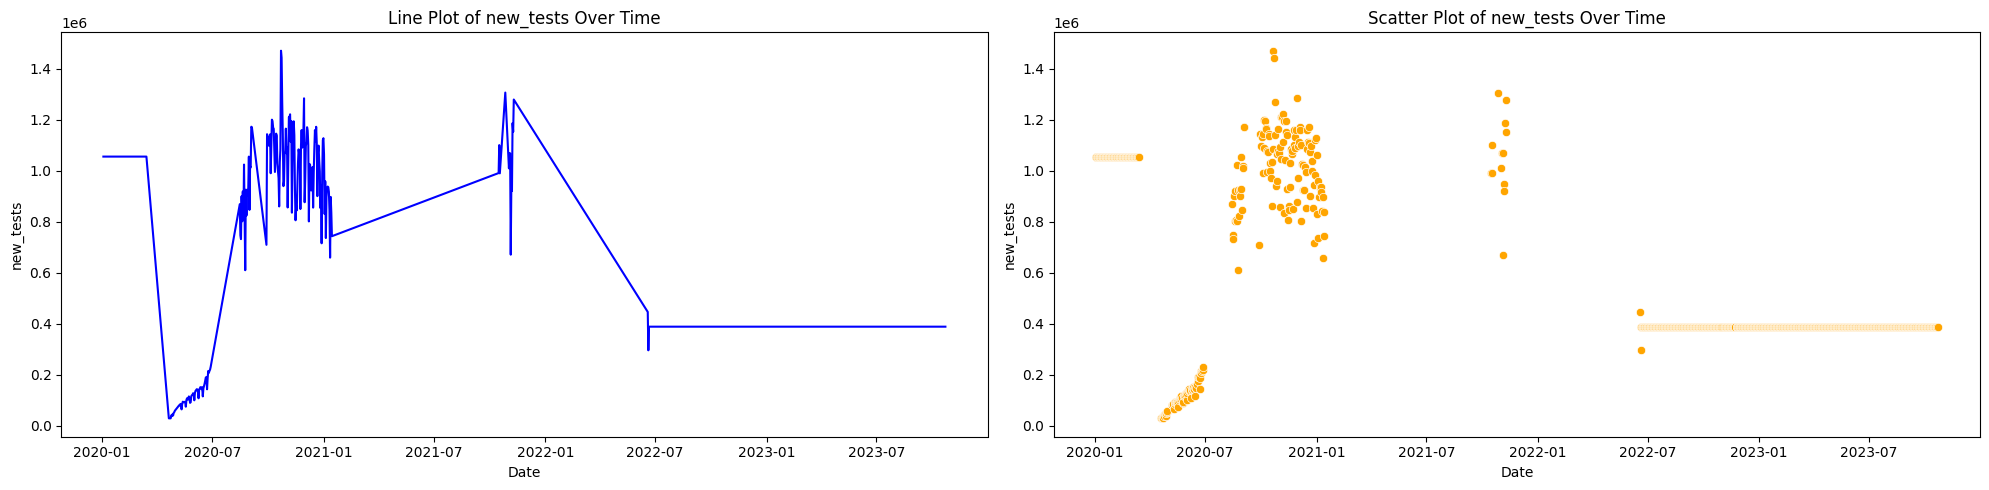

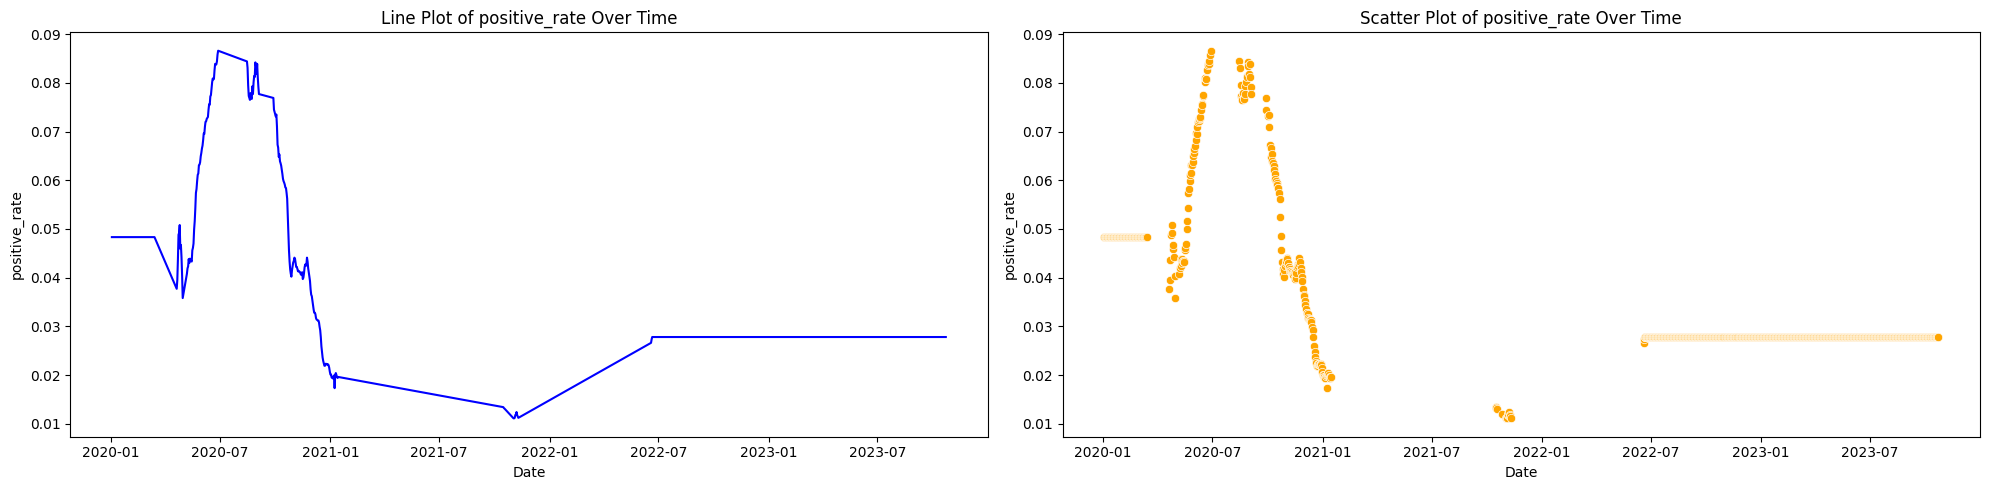

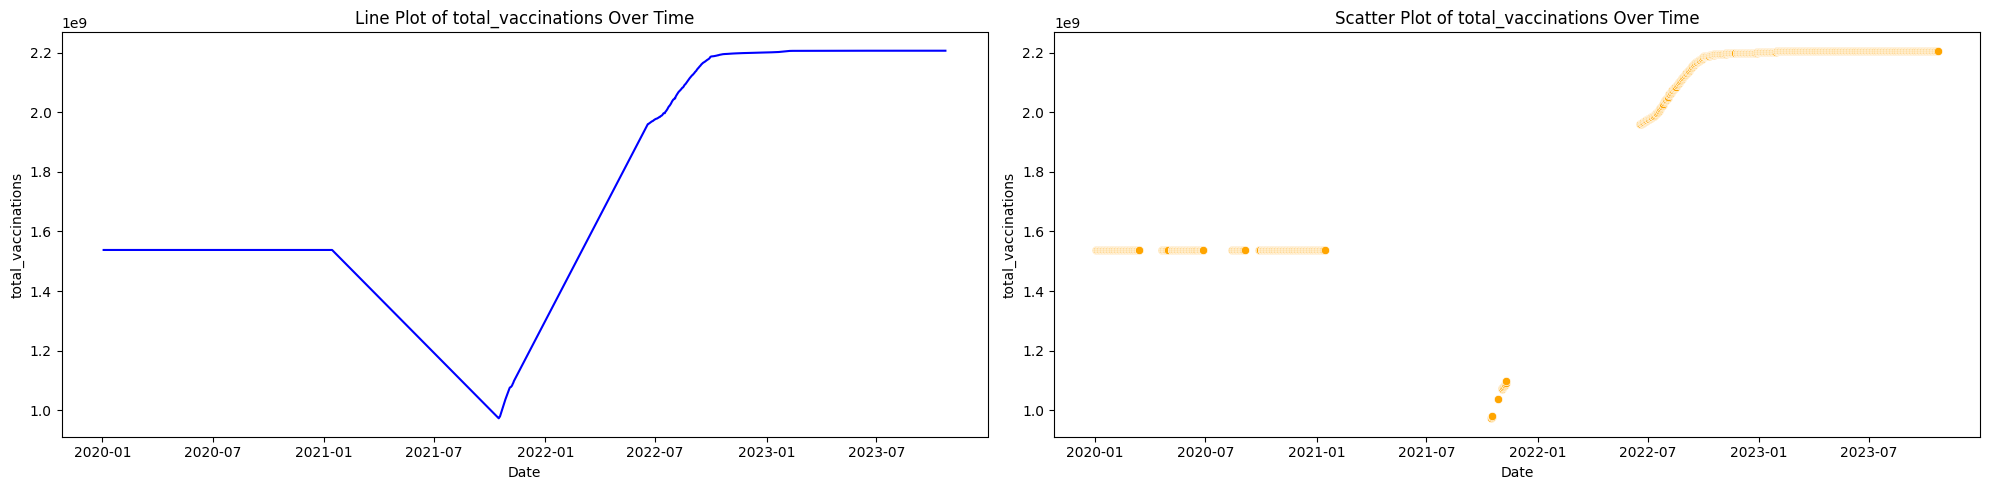

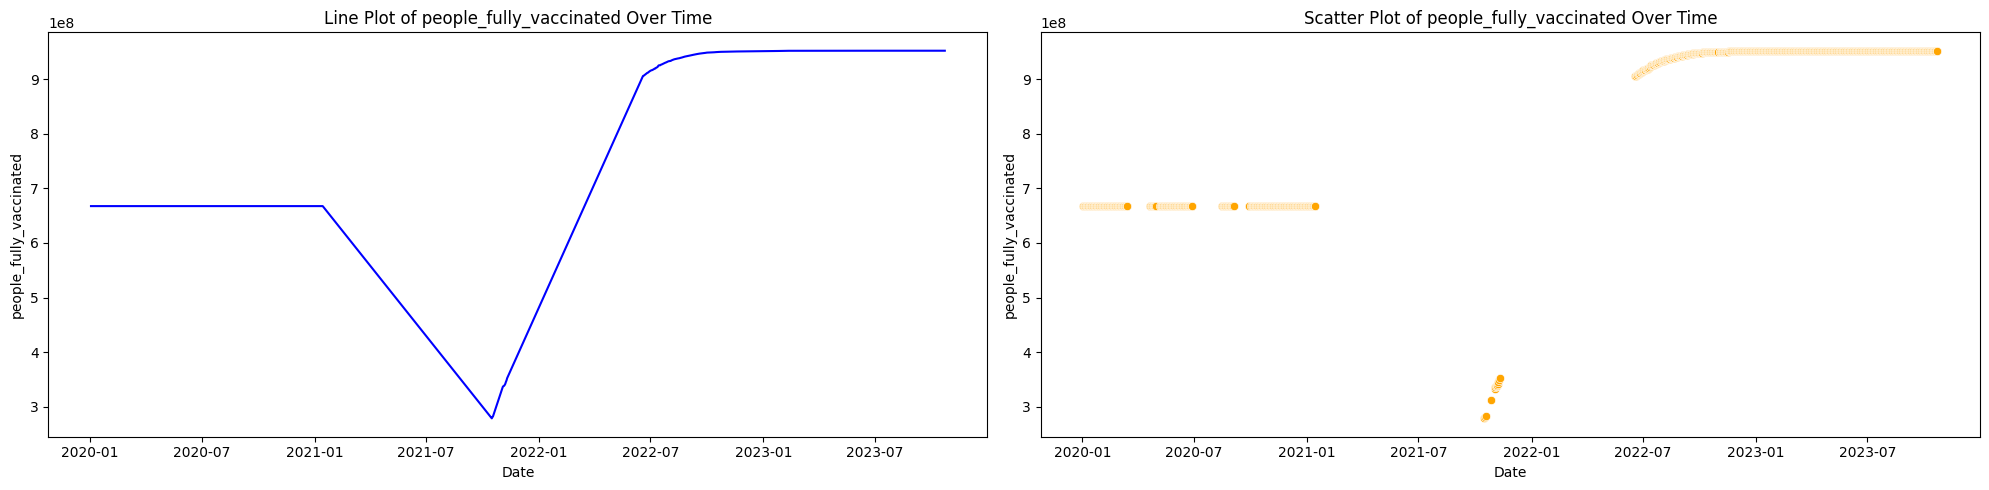

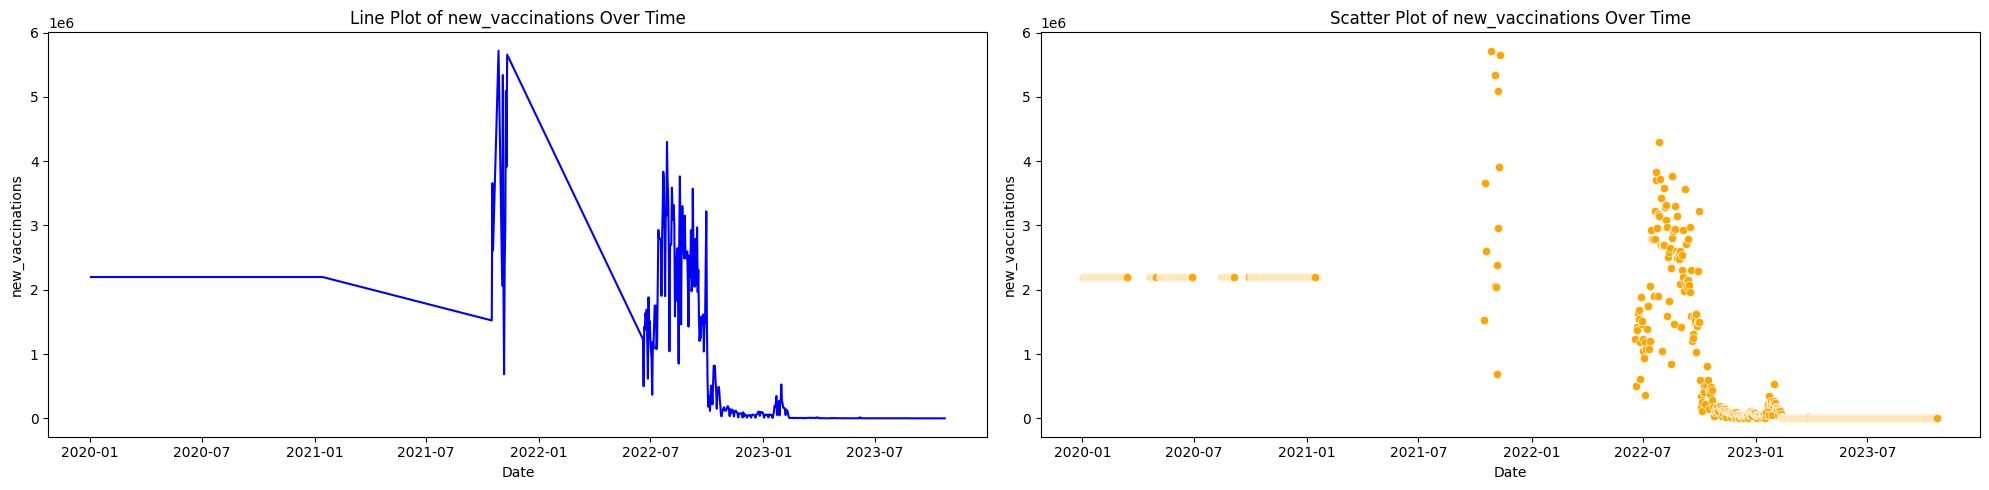

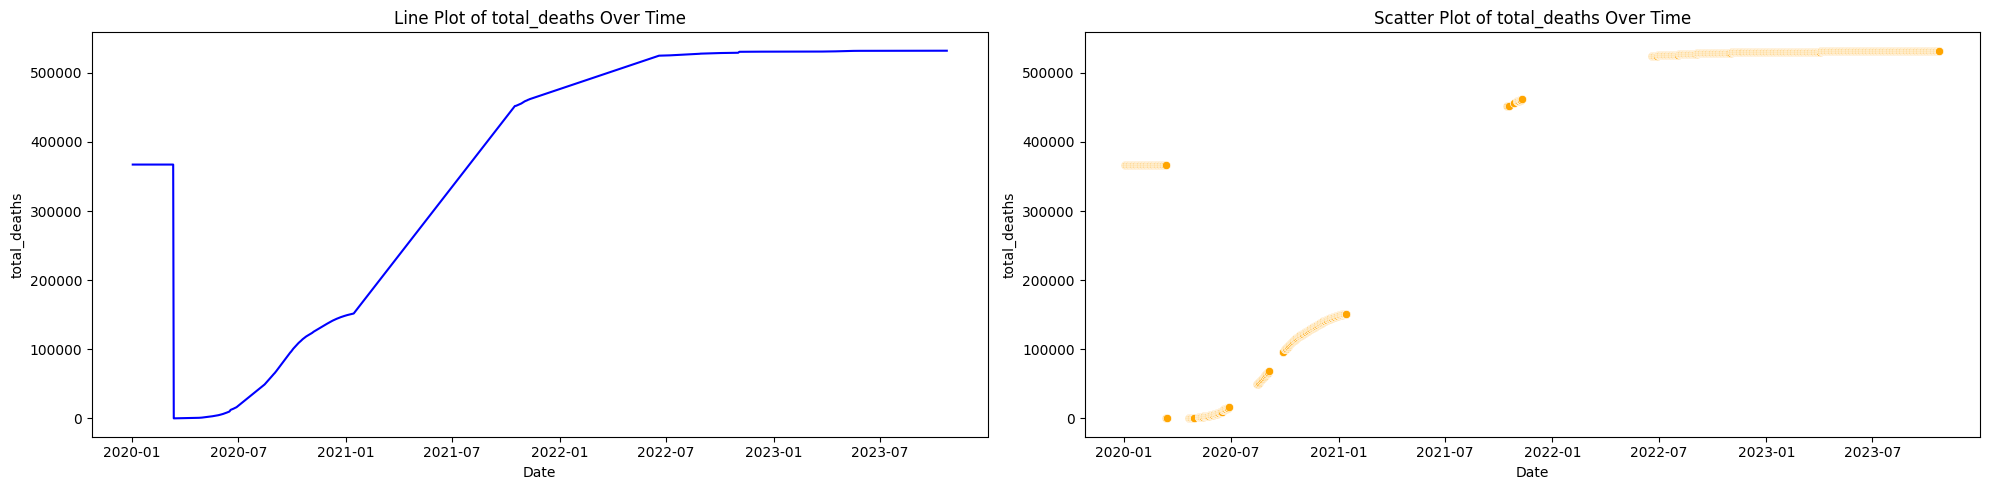

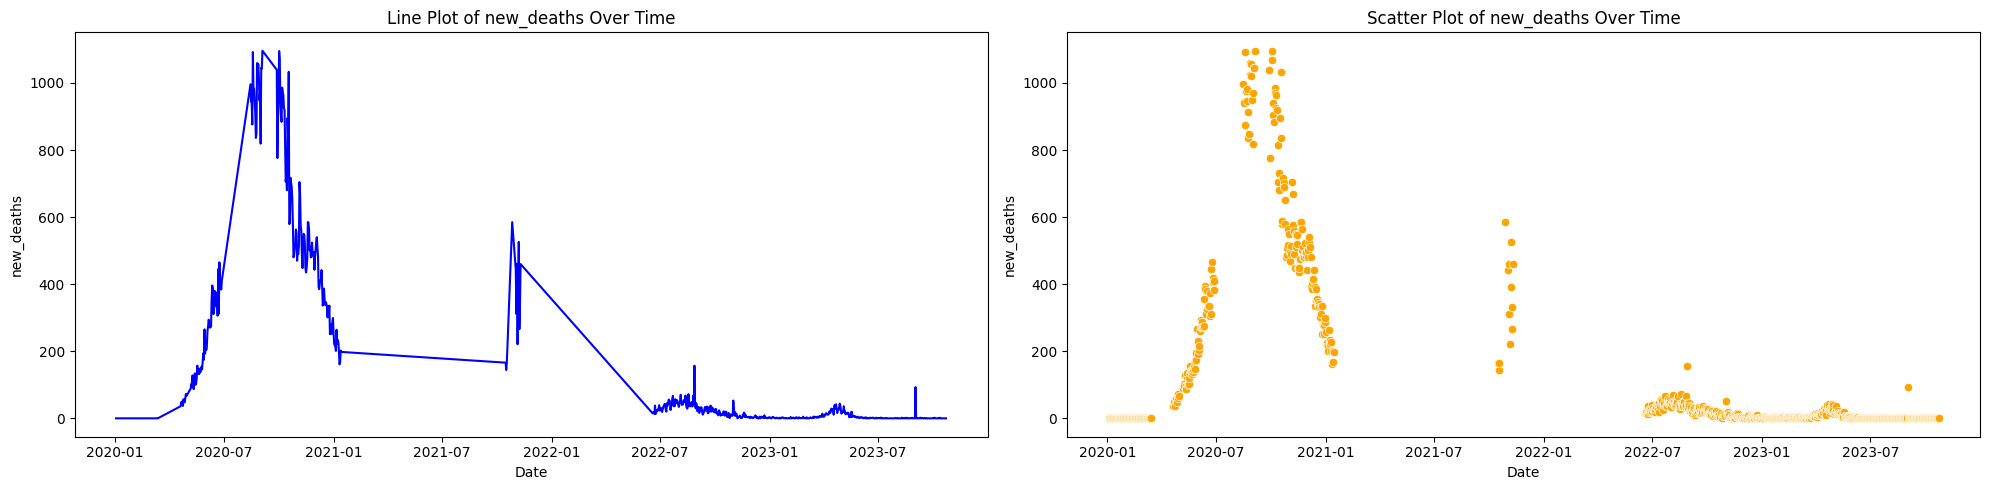

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d-%m-%Y')


for column in filtered_features:
    plt.figure(figsize=(20,5))

    # Line plot
    plt.subplot(1, 2, 1)
    plt.plot(df_cleaned['date'], df_cleaned[column], color='blue')
    plt.title(f'Line Plot of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)

    # Scatter plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df_cleaned['date'], y=df_cleaned[column], color='orange')
    plt.title(f'Scatter Plot of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)



    plt.tight_layout()
    plt.show()


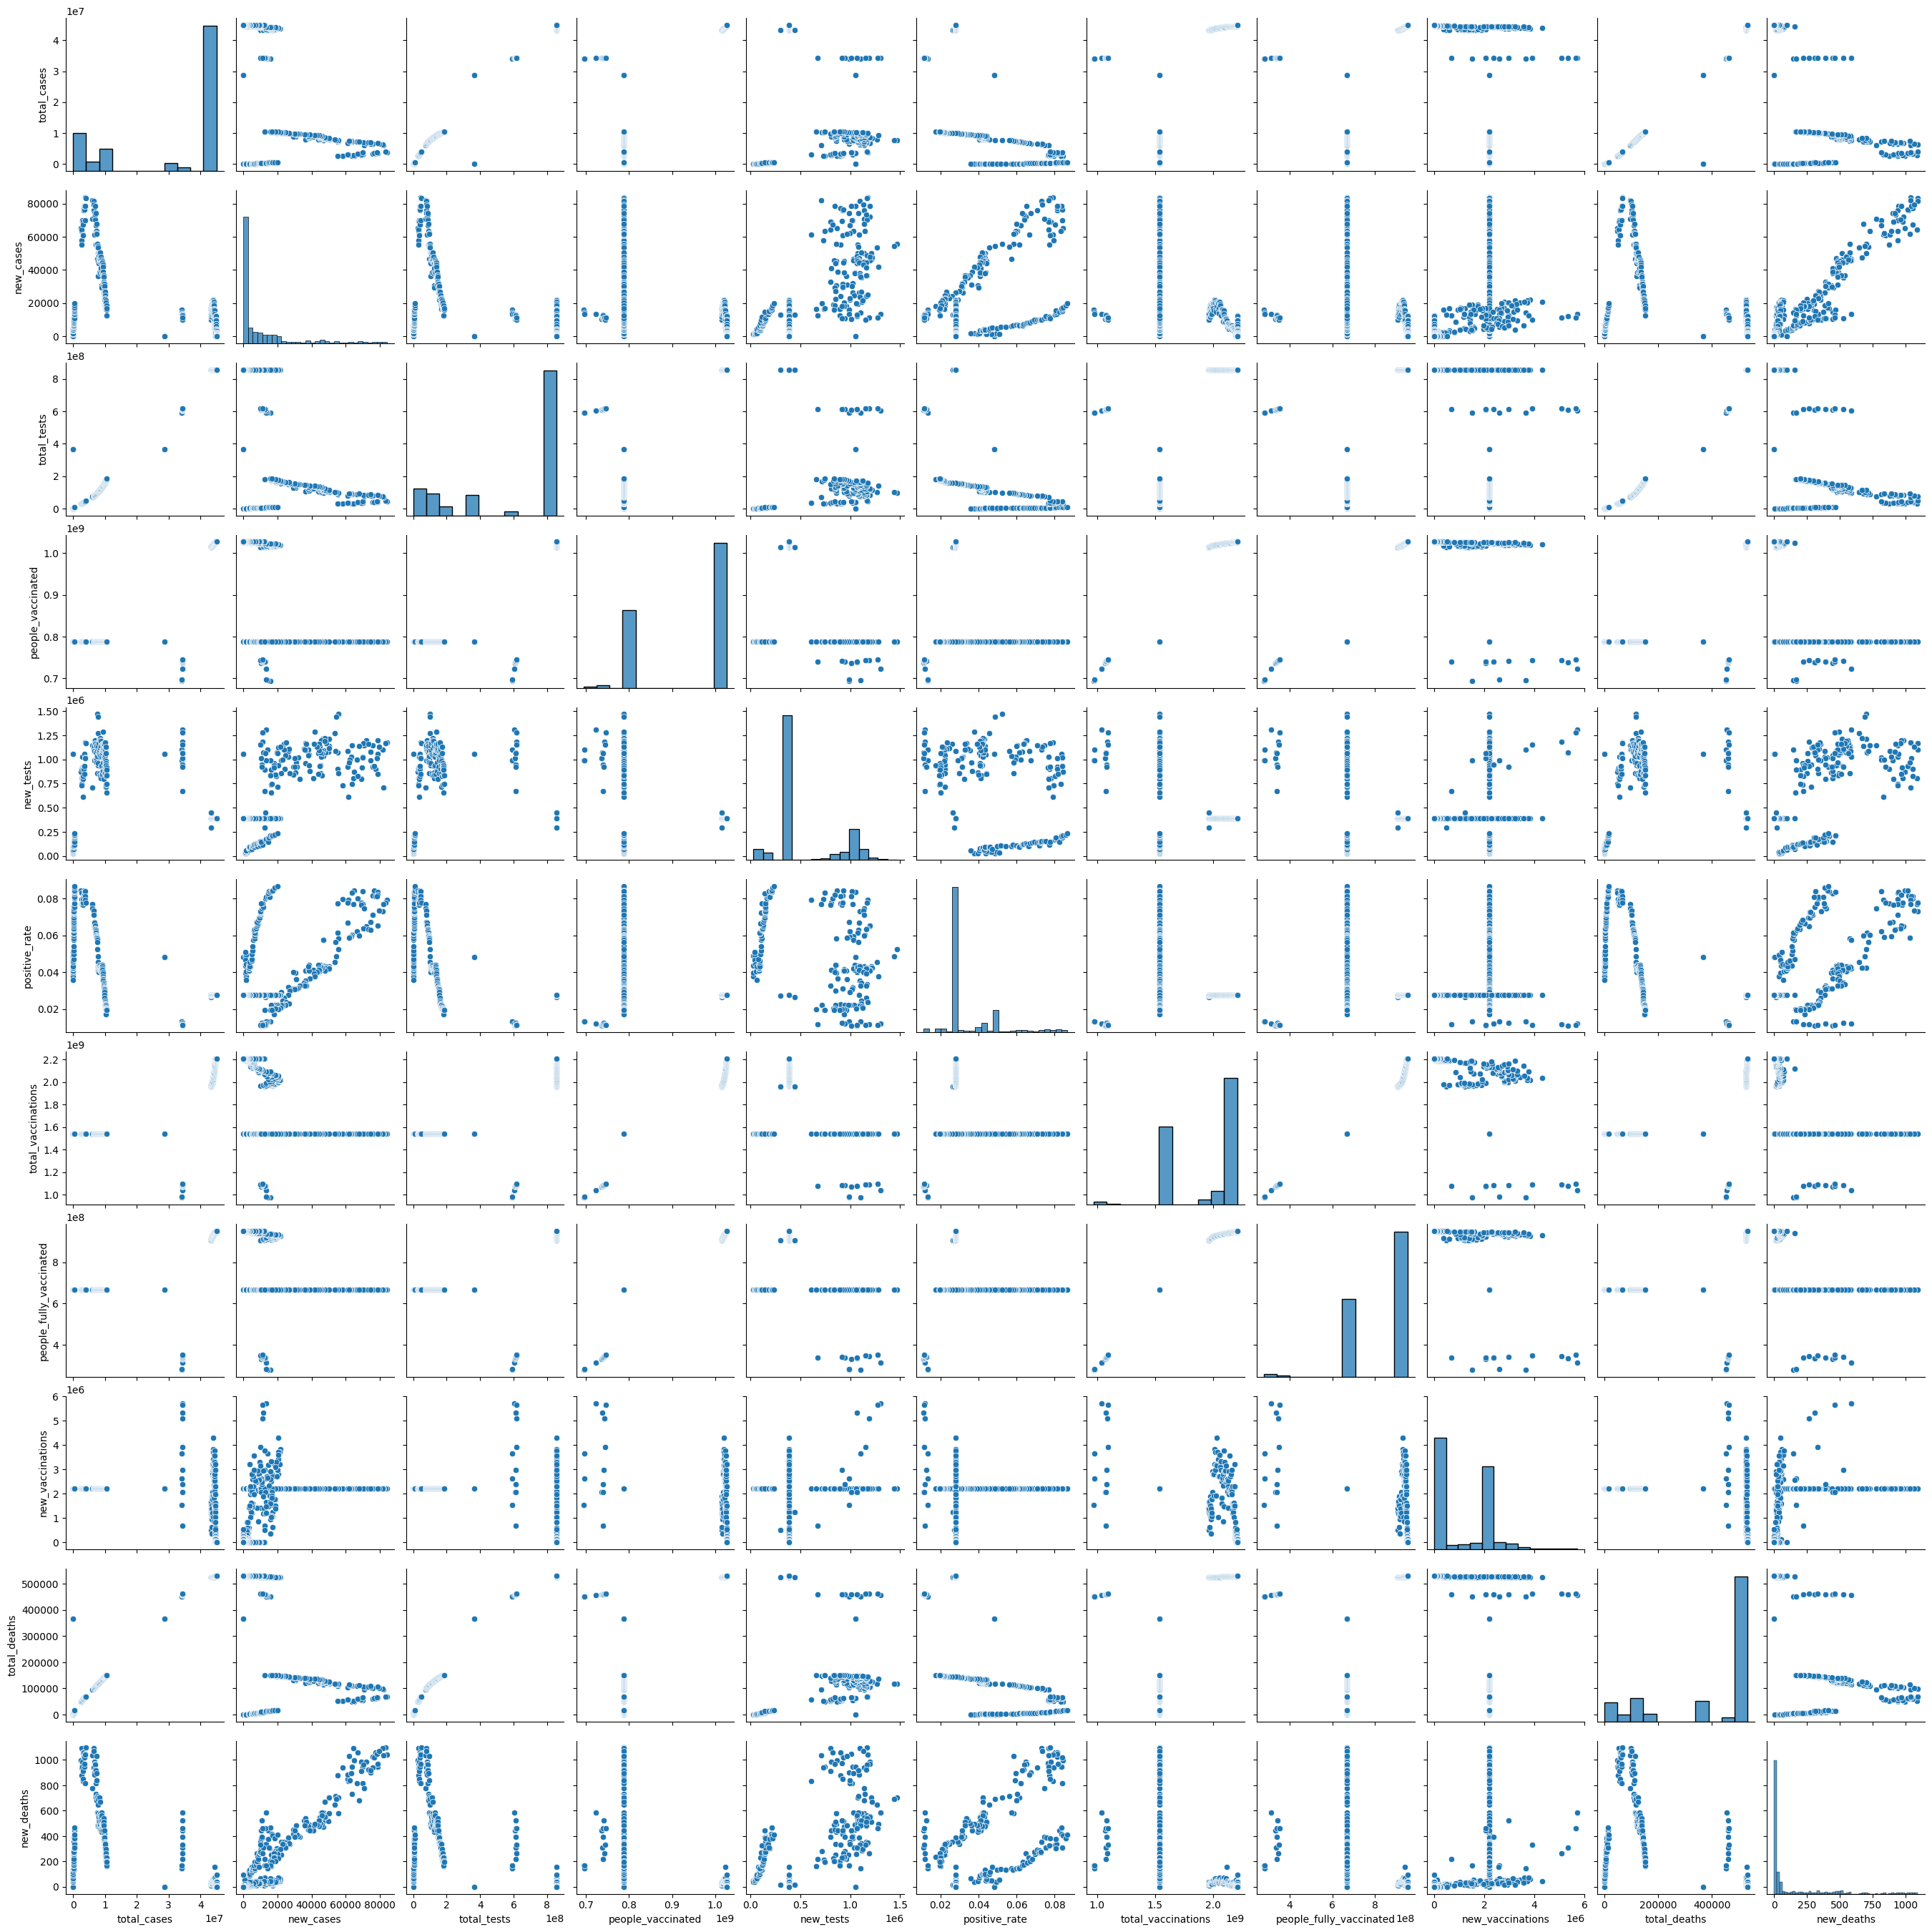

In [ ]:
sns.pairplot(df_cleaned[filtered_features])
plt.show()

## Feature Selection

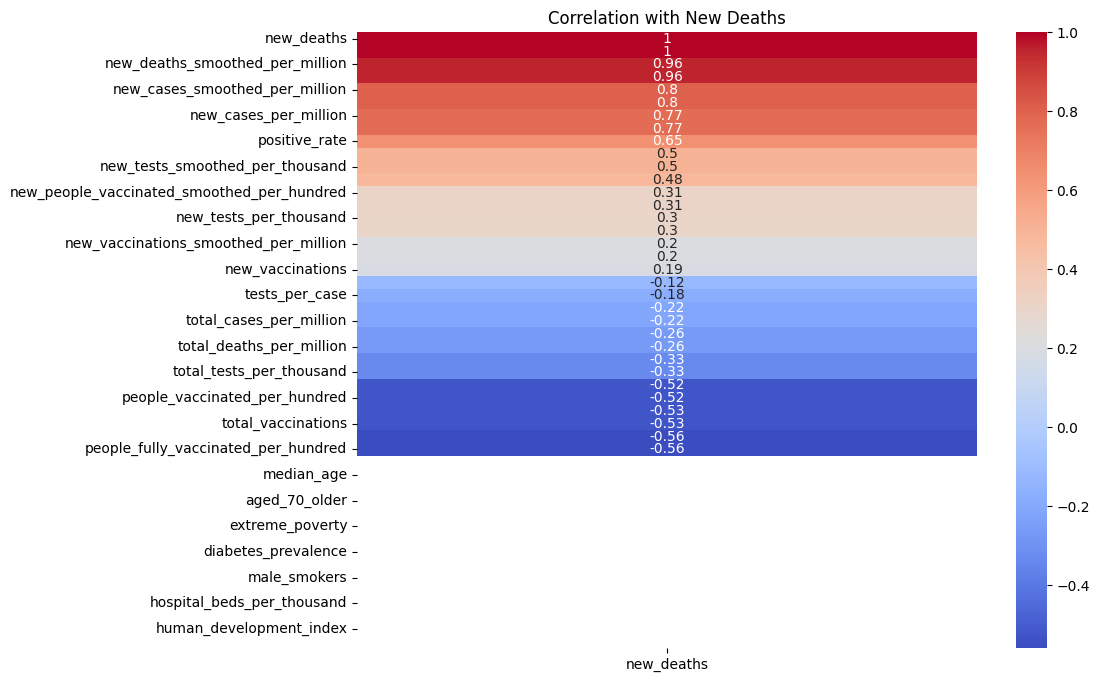

Top Selected Features: ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'total_vaccinations', 'people_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'stringency_index']


In [ ]:
df = df.drop(['date', 'tests_units'], axis=1, errors='ignore')

correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['new_deaths']].sort_values(by='new_deaths', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with New Deaths")
plt.show()

X = df.drop('new_deaths', axis=1)
y = df['new_deaths']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

selector = SelectKBest(mutual_info_regression, k=20)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("Top Selected Features:", list(selected_features))


## Model Building

### ARIMA Model

In [ ]:

result = adfuller(df['new_deaths'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# If p-value > 0.05, data is non-stationary; apply differencing


ADF Statistic: -3.204677196079223
p-value: 0.019715536018882575


In [ ]:
# Apply first differencing
df['new_deaths_diff'] = df['new_deaths'].diff().dropna()

result_diff = adfuller(df['new_deaths_diff'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])


ADF Statistic after differencing: -15.874021877326593
p-value after differencing: 8.913794439583317e-29


The results after first differencing indicate that the data is now stationary because:

* The ADF Statistic is less than the critical values (e.g., -2.9 for 5% significance).
* The p-value (0.0001) is much less than 0.05, so we reject the null hypothesis of non-stationarity.
This means your target variable (new_deaths_diff) is ready for ARIMA modeling

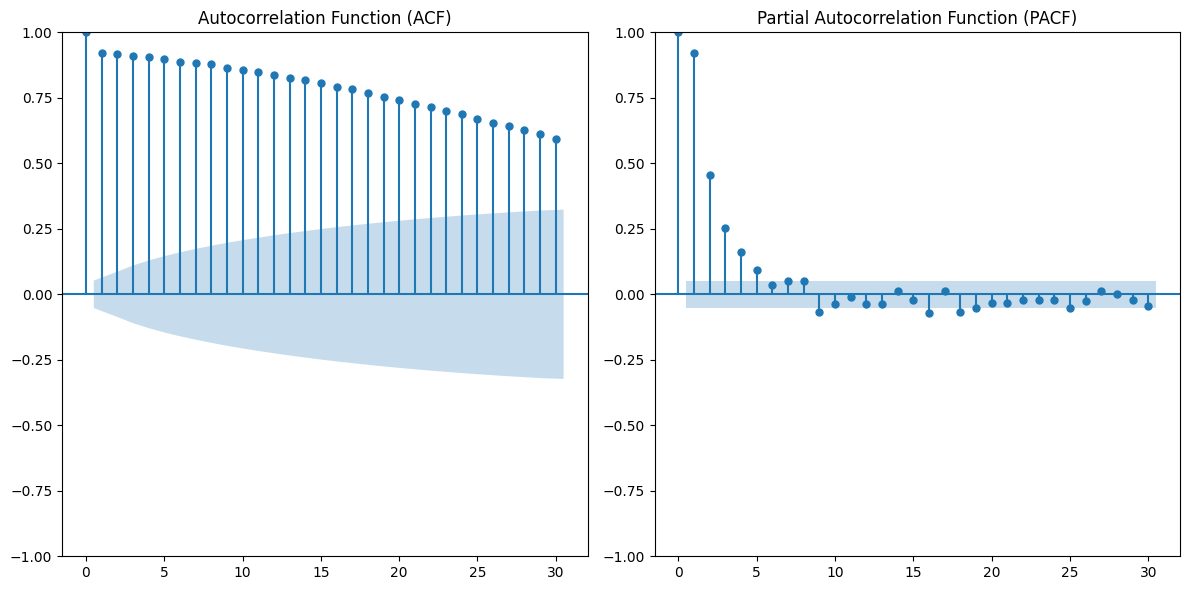

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['new_deaths'].dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(df['new_deaths'].dropna(), lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


From this PACF plot, you can start with p=4.From your ACF Plot, determine q, (e.g., start with 𝑞=1 or q=2).

Now that your data is stationary, you can proceed to:

Identify ARIMA parameters (p, d, q):

* p (AR term): Number of lag observations in the model.
* d (Differencing): Already determined as 1 (first difference).
* q (MA term): Number of lagged forecast errors in the model.

Use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to determine 𝑝, 𝑞 and d.



In [ ]:
model = ARIMA(df['new_deaths'], order=(4, 1, 1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             new_deaths   No. Observations:                 1390
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -9638.287
Date:                Sat, 05 Apr 2025   AIC                          19288.574
Time:                        08:51:15   BIC                          19319.992
Sample:                             0   HQIC                         19300.323
                               - 1390                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1785      0.084     -2.116      0.034      -0.344      -0.013
ar.L2         -0.0863      0.056     -1.528      0.126      -0.197       0.024
ar.L3         -0.0578      0.037     -1.577      0.1

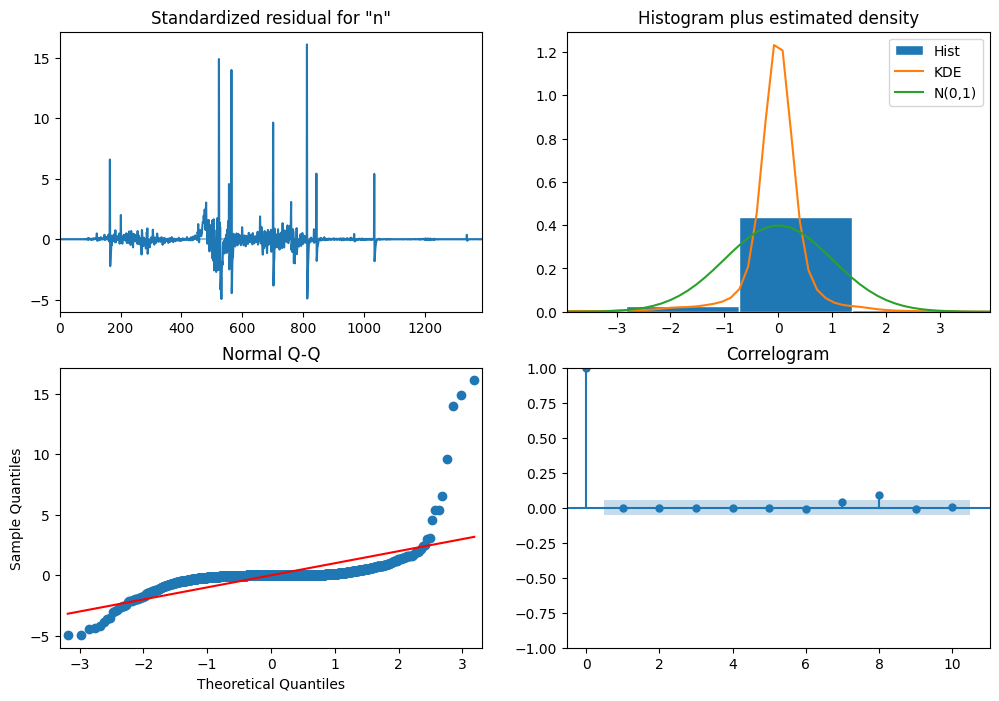

In [ ]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


**Standardized Residuals (Top-Left)**
* What it shows: This plot displays the residuals (differences between actual and predicted values) standardized to have a mean of 0 and a standard deviation of 1.
* What to look for:
The residuals should resemble white noise (no clear pattern).
They should be evenly distributed around zero without trends or clustering

**Histogram + KDE (Top-Right)**
* What it shows: A histogram of the residuals with a Kernel Density Estimate (KDE) overlay, and a QQ plot comparison with the normal distribution.
* What to look for:
The residuals should follow a normal distribution.
The histogram should appear bell-shaped, and the QQ plot should form a straight diagonal line.

**QQ Plot (Bottom-Left)**
* What it shows: A Quantile-Quantile (QQ) plot comparing the quantiles of the residuals to the theoretical quantiles of a normal distribution.
* What to look for:
If the residuals are normally distributed, the points should align closely with the diagonal line.
Deviations from the line suggest non-normality in the residuals.

**Correlogram (ACF of Residuals) (Bottom-Right)**
* What it shows: The autocorrelation of residuals plotted as a function of lag.
* What to look for:
The autocorrelations should be close to zero at all lags (no significant correlation).
Residuals with significant autocorrelations suggest that the model has not captured all patterns in the data.


In [ ]:
forecast = model_fit.forecast(steps=10)
print("Forecasted values:", forecast)


Forecasted values: 1390    0.002481
1391    0.002038
1392    0.001903
1393    0.001822
1394    0.001823
1395    0.001847
1396    0.001850
1397    0.001849
1398    0.001848
1399    0.001847
Name: predicted_mean, dtype: float64


In [ ]:
fitted_values = model_fit.fittedvalues
actual_values = df['new_deaths'][fitted_values.index]

mae = mean_absolute_error(actual_values, fitted_values)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 76.8248588456453


In [ ]:
actual_values_for_rmse = df['new_deaths'][fitted_values.index]

rmse = np.sqrt(mean_squared_error(actual_values_for_rmse, fitted_values))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 249.51225082695976


In [ ]:
train_size = int(len(df['new_deaths']) * 0.8)
train, test = df['new_deaths'][:train_size], df['new_deaths'][train_size:]

model = ARIMA(train, order=(4, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))


In [ ]:
mae_test = mean_absolute_error(test, forecast)
print("Out-of-Sample Mean Absolute Error (MAE):", mae_test)

rmse_test = np.sqrt(mean_squared_error(test, forecast))
print("Out-of-Sample Root Mean Squared Error (RMSE):", rmse_test)


Out-of-Sample Mean Absolute Error (MAE): 4.568049416169409
Out-of-Sample Root Mean Squared Error (RMSE): 10.599362197047139


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mape = mean_absolute_percentage_error(test, forecast)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


Mean Absolute Percentage Error (MAPE): 373298409977.9151 %


### LSTM model

In [ ]:

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['new_deaths']])

data_scaled = pd.DataFrame(data_scaled, columns=['new_deaths'])

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 10
X, y = create_sequences(data_scaled['new_deaths'].values, n_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0179 - val_loss: 0.0053
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0

In [ ]:
y_pred = model.predict(X_test)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred)

mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
Mean Squared Error (MSE): 73249.46714665354
Mean Absolute Error (MAE): 80.52406779579495


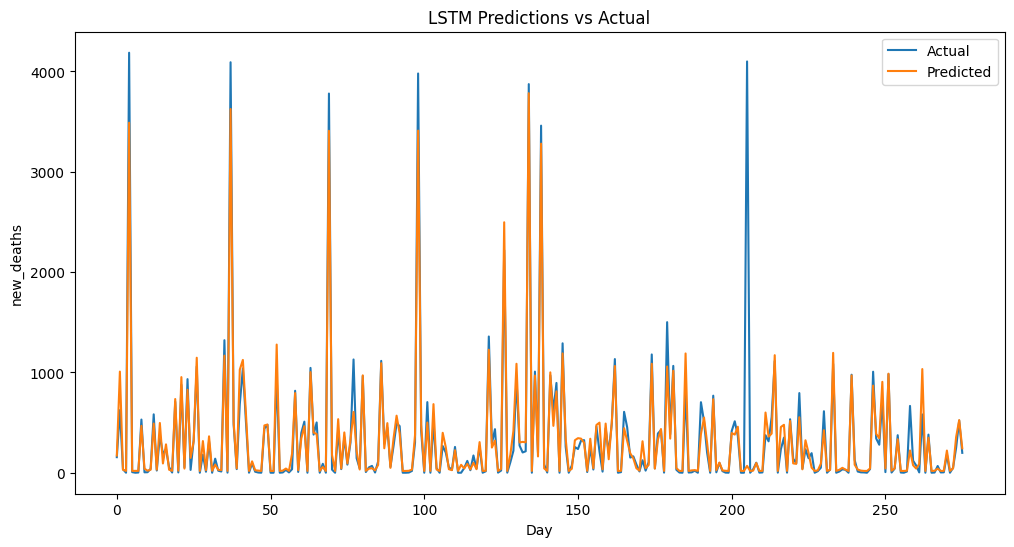

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Day')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [ ]:
n_forecast = 10

input_seq = data_scaled['new_deaths'].values[-n_steps:].reshape(1, n_steps, 1)

forecast = []
for i in range(n_forecast):
    pred = model.predict(input_seq)
    forecast.append(pred[0, 0])
    input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
forecast_original = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))


forecast_dates = pd.date_range(start=df_india['date'].iloc[-1], periods=n_forecast + 1, freq='D')[1:]

forecast_df = pd.DataFrame(forecast_original, index=forecast_dates, columns=['forecasted_new_deaths'])

print(forecast_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
            forecasted_new_deaths
2023-10-24              17.694031
2023-10-25              17.979677
2023-10-26              18.455053
2023-10-27              19.067722
2023-10-28              19.767721
2023-10-29              20.540369
2023-10-30              21.404066
2023-10-31              22.443718
2023-11-01              23.783537
2023-11-02              25.383867


### XGboost

In [ ]:
df['date']=df_india['date']

In [ ]:
df['date'] = pd.to_datetime(df_india['date'], format='%d-%m-%Y')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

selected_features = ['day', 'month', 'year']
X = df[selected_features]
y = df['new_deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 77.69904639727349
Mean Squared Error (MSE): 28504.922938642056
Root Mean Squared Error (RMSE): 168.83401001765625
R-squared (R²): 0.9243428338531494


In [ ]:
def forecast_future(model, last_known_values, n_days):
    forecast = []
    current_input = np.array(last_known_values).reshape(1, -1)

    for _ in range(n_days):
        next_value = model.predict(current_input)[0]
        forecast.append(next_value)


        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1] = next_value

    return forecast

last_known_values = X_test.iloc[-1].values

forecasted_values = forecast_future(model, last_known_values, n_days=10)

print("Forecasted Values for the next 10 days:")
print(forecasted_values)

Forecasted Values for the next 10 days:
[np.float32(449.11996), np.float32(393.33173), np.float32(275.8605), np.float32(275.8605), np.float32(275.8605), np.float32(275.8605), np.float32(275.8605), np.float32(275.8605), np.float32(275.8605), np.float32(275.8605)]
